<a href="https://colab.research.google.com/github/18018183uhi/18018183_DataAnalytics2024/blob/main/Assignment_1_18018183.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION
The purpose of this report is to determine the eligibility of a linear regression model to predict the number of collisions in New York on a given day based on weather data. The data will be analyzed to determine which values have an impact on the number of collisions with either positive or negative correlation. The data shall then be cleaned to improve correlation and remove dirty data, then exported for future use in the creation of prediction models using Linear and Deep Neural Network (DNN) regression models.

It is well known that adverse weather conditions can greatly impact driver and vehicle performance on the road, impacting visibility, road traction and performance, and traffic flow to greatly affect the chances of an accident occuring (Federal Highway Administration, 2023).

Assessment of the impact of weather conditions on the quantity of road accidents has been performed many times, as well as attempts to predict or model collisions using weather data. The UK Department for Transport found that estimated average rainfall and temperature levels could model estimated road accident fatalities to a reasonably high accuracy (Department for Transport, 2014). (Davies, 2017) presents the case that temperature and rainfall affect the counts for serious injuries and deaths from road accidents.

It has been found that modelling combined meteorological parameters, it is possible to model and analyse the relationship between the weather conditions and crash probability (Becker, Rust, & Ulbrich, 2022). In this report, data shall be collected, collated, analysed and cleaned to identify which weather data values have the greatest impact on the number of road collisions in preparation for the creation of prediction regression models.

# Data Gathering
The data to be used in this report was predetermined in the assignment brief to be gathered from publicly available datasets from BigQuery (Google, 2024). Data on collisions was sourced from the New York Police Department, and data on weather was collected from the National Oceanic and Atmospheric Administration (NOAA), the Global Surface Summary of the Day (GSOD).

To prepare the data for analysis, it was gathered using SQL queries within BigQuery as follows:

# Collisions
First, the number of collisions per day was collected into a view:

> CREATE VIEW 'uhi-project-2024.DA-assignment-data.collision_data_count' AS SELECT CAST(timestamp as DATE) as collision_date, COUNT(CAST(timestamp as DATE)) AS NUM_COLLISIONS
FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions`
GROUP BY collision_date

A copy of the data in a new view was created, adding the day of the week:

> CREATE VIEW 'uhi-project-2024.DA-assignment-data.collision_data_count_final' AS
SELECT FORMAT_DATE("%u", collision_date) as day, collision_date, NUM_COLLISIONS
FROM `uhi-project-2024.DA_assignment_data.collision_data_count`

# Weather
Only data from New York is applicable to the collision data, so the stn value 725060 was used to filter data from the required region. A view containing all relevant time and weather data was created:

> CREATE VIEW 'uhi-project-2024.DA-assignment-data.weather_2012_to_2024' AS
SELECT DATE (CAST(year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog FROM `bigquery-public-data.noaa_gsod.gsod2012` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog FROM `bigquery-public-data.noaa_gsod.gsod2013` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog FROM `bigquery-public-data.noaa_gsod.gsod2014` WHERE stn='725060' AND wban='14756'
union all
SELECT DATE (CAST (year as INT64), CAST(mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog FROM `bigquery-public-data.noaa_gsod.gsod2015` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog FROM `bigquery-public-data.noaa_gsod.gsod2016` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog FROM `bigquery-public-data.noaa_gsod.gsod2017` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST(mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog FROM `bigquery-public-data.noaa_gsod.gsod2018` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog FROM `bigquery-public-data.noaa_gsod.gsod2019` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog FROM `bigquery-public-data.noaa_gsod.gsod2020` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog FROM `bigquery-public-data.noaa_gsod.gsod2021` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog FROM `bigquery-public-data.noaa_gsod.gsod2022` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog FROM `bigquery-public-data.noaa_gsod.gsod2023` WHERE stn='725060'
union all
SELECT DATE (CAST (year as INT64), CAST (mo as INT64), CAST (da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog FROM `bigquery-public-data.noaa_gsod.gsod2024` WHERE stn='725060'
ORDER BY year, mo, da

# Collation

To finalise data preparation, the two views were collated into a final table. The initial table was not ordered correctly, so the table was recreated as v2 ordering correctly by date:

> CREATE TABLE `uhi-project-2024.DA_assignment_data.collated_collision_data_v2`
AS SELECT day, year, mo, da, collision_date, temp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, NUM_COLLISIONS FROM
`uhi-project-2024.DA_assignment_data.weather_2012_to_2024` as weather, `uhi-project-2024.DA_assignment_data.collision_data_count_final` as complaints WHERE
complaints.collision_date = weather.date
ORDER BY year, mo, da

The table was then saved and uploaded to GitHub for use in this report.




# Initial Testing

The data was imported into this colab file and examined to confirm it had imported correctly.

In [2]:
# Import collected collision and weather data
ls <- read.csv("https://raw.githubusercontent.com/18018183uhi/18018183_DataAnalytics2024/main/assignment_collision_data_v2.csv", stringsAsFactors = TRUE)

In [3]:
# Inital tests to make sure data is imported correctly
head(ls)
summary(ls)

day year mo da collision_date temp slp    visib wdsp mxpsd gust  max  min 
1 7   2012 7  1  2012-07-01     83.6 1008.9  9.7  4.1   9.9   18.1 93.0 66.0
2 1   2012 7  2  2012-07-02     80.3 1011.6 10.0  3.8  15.0  999.9 88.0 66.9
3 2   2012 7  3  2012-07-03     79.8 1012.8 10.0  2.9  12.0  999.9 88.0 63.0
4 3   2012 7  4  2012-07-04     81.8 1009.1  9.2  3.6  11.1  999.9 91.0 68.0
5 4   2012 7  5  2012-07-05     86.7 1007.4  9.4  3.8  15.0  999.9 93.9 70.0
6 5   2012 7  6  2012-07-06     81.9 1011.7 10.0  3.1   9.9  999.9 91.0 66.9
  prcp  sndp  fog NUM_COLLISIONS
1  0.00 999.9 0   538           
2  0.00 999.9 0   564           
3  0.00 999.9 0   664           
4  0.06 999.9 0   432           
5 99.99 999.9 0   591           
6  0.00 999.9 0   638

      day             year            mo              da       
 Min.   :1.000   Min.   :2012   Min.   : 1.00   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2015   1st Qu.: 4.00   1st Qu.: 8.00  
 Median :4.000   Median :2018   Median : 7.00   Median :16.00  
 Mean   :3.999   Mean   :2018   Mean   : 6.59   Mean   :15.71  
 3rd Qu.:6.000   3rd Qu.:2021   3rd Qu.:10.00   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2024   Max.   :12.00   Max.   :31.00  
                                                               
    collision_date      temp            slp            visib       
 2012-07-01:   1   Min.   : 5.80   Min.   :  989   Min.   : 0.200  
 2012-07-02:   1   1st Qu.:41.40   1st Qu.: 1012   1st Qu.: 7.300  
 2012-07-03:   1   Median :52.50   Median : 1016   Median : 9.500  
 2012-07-04:   1   Mean   :52.51   Mean   : 1023   Mean   : 8.364  
 2012-07-05:   1   3rd Qu.:64.90   3rd Qu.: 1022   3rd Qu.:10.000  
 2012-07-06:   1   Max.   :86.70   Max.   :10000   Max.   :10.000  
 (Other)   :

An description of the contents of each table column is listed below for proper understanding of the data collected:

* day - The day of the week from Monday to Sunday, stored as values 1 to 7.
* year - The year.
* mo - The month of the year.
* da - The day of the month,
* collision_date - The full date, stored in the format YYYY/MM/DD.
* temp - Mean temperature in Fahrenheit, accurate to .1 degree.
* slp - Mean sea level pressure, accurate to 1. millbar.
* visib - Mean visibility in miles, accurate to .1 miles.
* wdsp - Mean wind speed in knots, accurate to .1 knots.
* mxpsd - Max sustained wind speed in knots, accurate to .1 knots.
* gust - Max recorded wind speed in knots, accurate to .1 knots.
* max - Maximum recorded temperature in Fahrenheit, accurate to .1 degree.
* min - Maximum recorded temperature in Fahrenheit, accurate to .1 degree.
* prcp - Precipitation in inches, accurate to .01 inches.
* sndp - Snow depth in inches, accurate to .1 inches.
* fog - Presense of fog as a boolean.
* NUM_COLLISIONS - The number of traffic collisions that day.



# Effects on the Data by the 2020 Coronavirus Pandemic
It was assumed that the worldwide Coronavirus outbreak, officially recognised as a pandemic in March 2020 (World Health Organisation, 2020), would have a large impact on the number of collisions reported due to the PAUSE order enforced in New York (New York State, 2020). To verify this, collisions over time were plotted to examine the impact of the lockdown on the frequency of accidents.

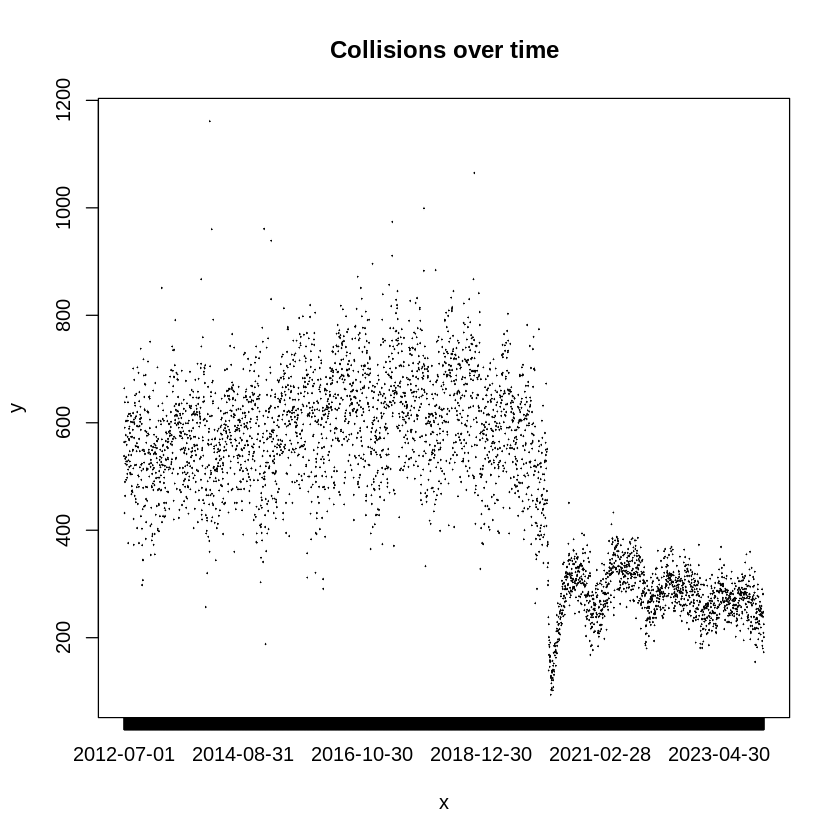

In [4]:
# Basic plot
plot(ls$collision_date, ls$NUM_COLLISIONS, main="Collisions over time")

As predicted, the dataset is completely unrecognisable after the beginning of 2020. Even when the city reopened over the later months of 2020 and early 2021 (Kerr, 2021), the collision data never recovered- instead settling into a new pattern. Due to this, the data set is effectively bisected into Pre-Covid and Post-Covid. Attempting to use both Pre-Covid and Post-Covid data for analysis would irreprably break any attempts to model collisions.

For the purposes of this report, the Pre-Covid data shall be used, due to the unprescedented nature of the lockdown and an assumption that without the global impact of the coronavirus pandemic, the patterns observed Pre-Covid would have continued unabated.

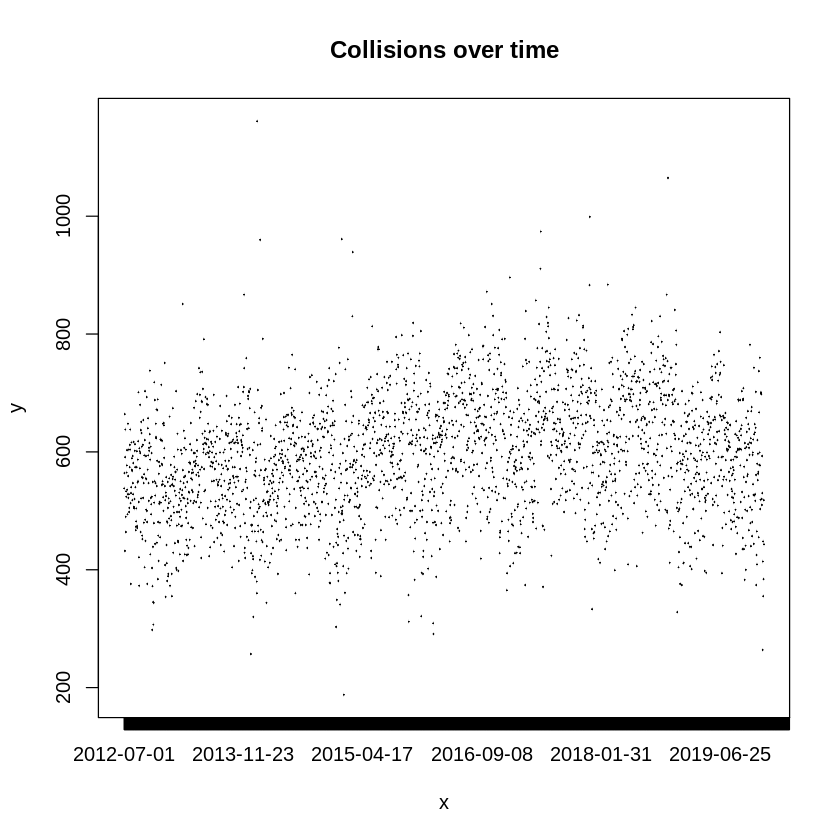

In [5]:
# Data from 2012 to 2019
ls2 <- ls[which(ls$year <= 2019), ]
plot(ls2$collision_date, ls2$NUM_COLLISIONS, main="Collisions over time", xlim=c(0, 2740))


While the overall data still looks spread wildly between highs and lows, a yearly pattern of collisions increasing and decreasing over time can be observed.

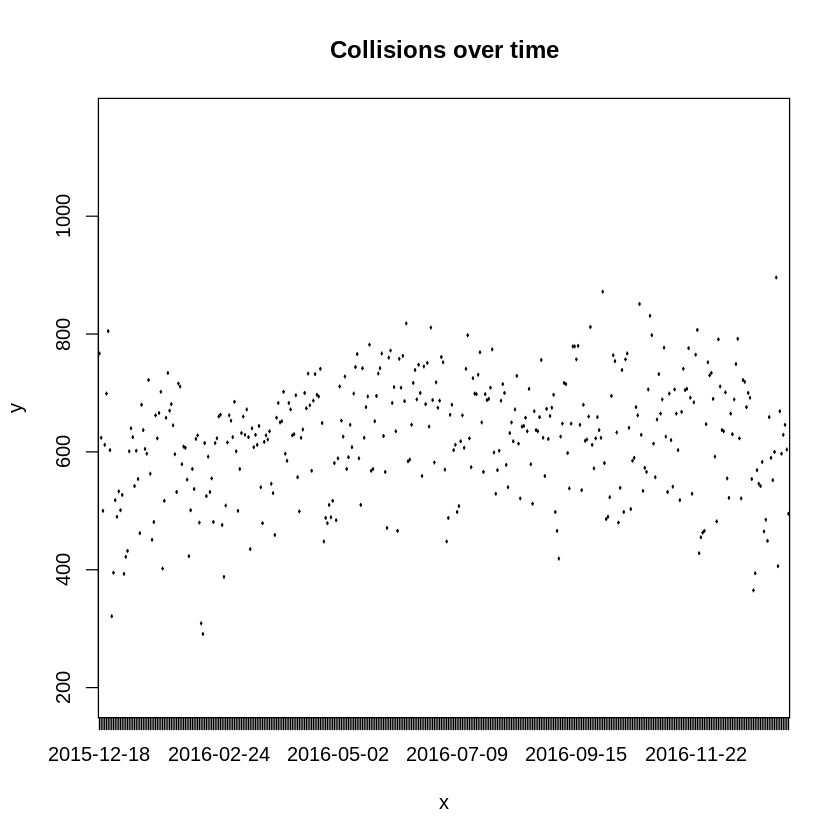

In [6]:
# Collisions over 2016
ls3 <- ls2
plot(ls3$collision_date, ls3$NUM_COLLISIONS, main="Collisions over time", xlim=c(1280, 1645))

It is assumed that each year follows a similar pattern.

# Initial Observations
To begin determining which data values are helpful in predicting the number of collisions, every value was plotted against NUM_COLLISIONS to check for linear patterns using a line of best fit. No in-depth cleaning is performed yet, so patterns and correlations may be stronger or weaker than they initially appear.

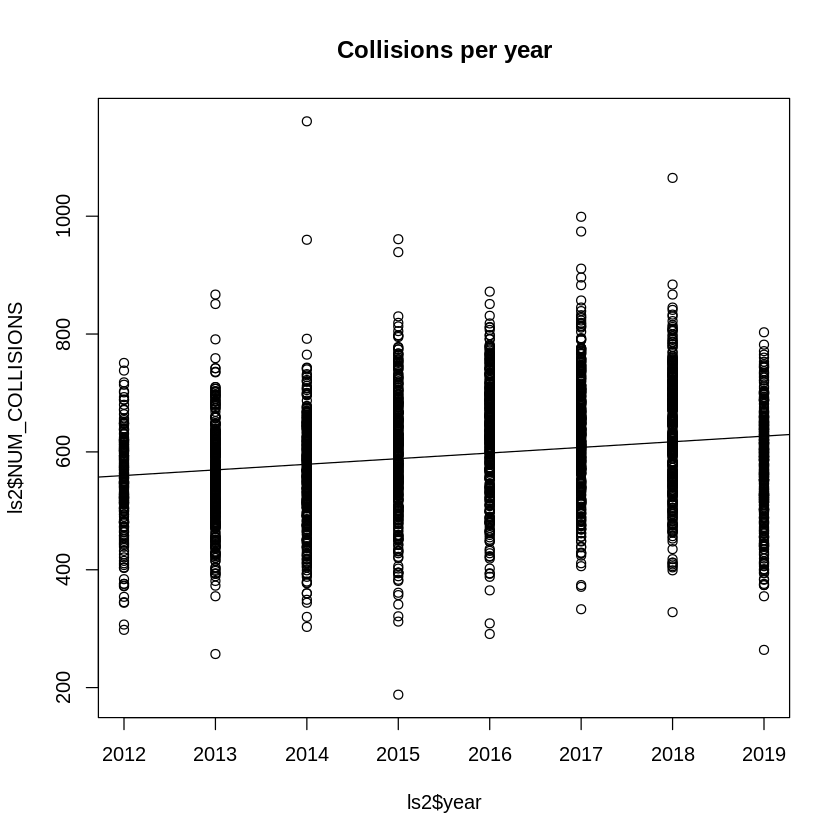

In [7]:
# Collisions per year
plot(ls2$year, ls2$NUM_COLLISIONS, main="Collisions per year")
abline(lm(ls2$NUM_COLLISIONS ~ ls2$year))

As expected, there appears to be a slight increase in collisions over time, presumably due to population growth and an increase in car usage, both factors contributing to an increase in traffic within the area measured. There are a some visible outliers that will need to be cleaned, though more observations are required before any assumptions can be made.

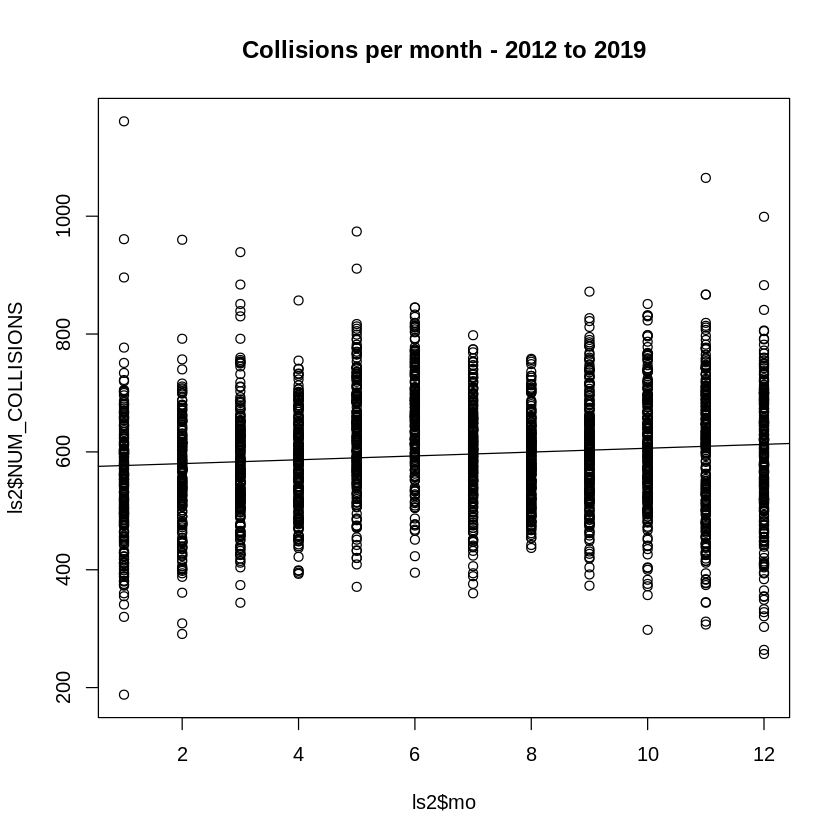

In [8]:
# Collisions per month
plot(ls2$mo, ls2$NUM_COLLISIONS, main="Collisions per month - 2012 to 2019")
abline(lm(ls2$NUM_COLLISIONS ~ ls2$mo))

There also appears to be a slight upward trend throughout each year, with a small drop in the summer months of July and August. This drop is most likely due to the summer school break which lasts from late June to early September (Weaver, 2023)

Once collisions continue to increase in September, the slight upward trend continues until a large drop in December. This can most likely be attributed to a drop in overall travel after Christmas and New Year.

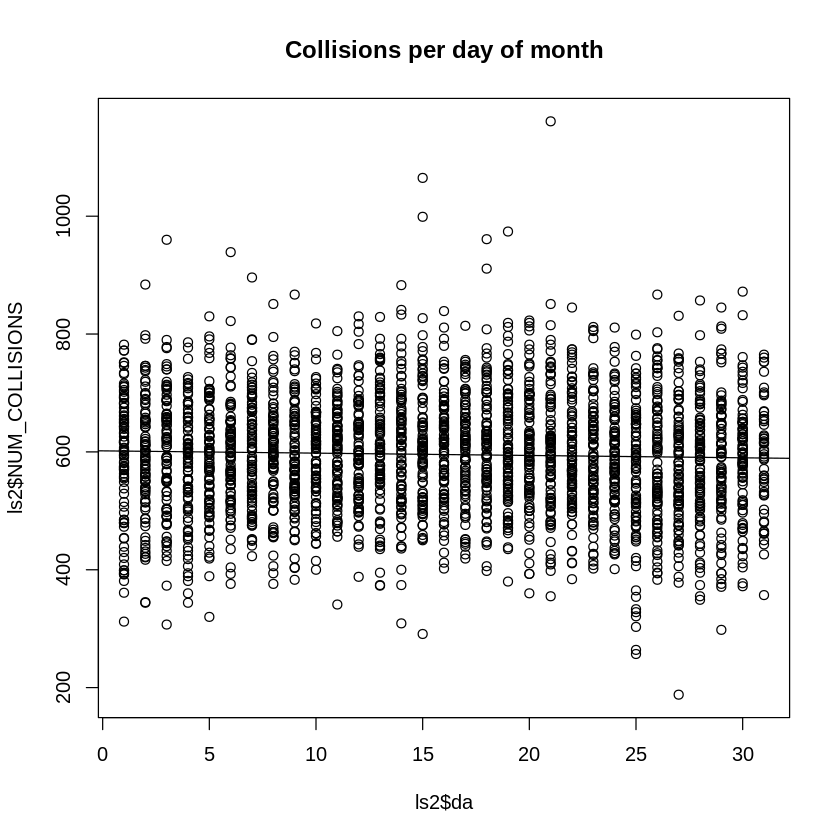

In [9]:
# Collisions per day of month
plot(ls2$da, ls2$NUM_COLLISIONS, main="Collisions per day of month")
abline(lm(ls2$NUM_COLLISIONS ~ ls2$da))

Unlike over the years and months within the year, there is no strong linear relationship between any given day and the number of collisions.

However, given that the above graph contains the data for all twelve months combined, it is not helpful for showing if any individual month contains any such correlation. To properly view any potential patterns within individual months, the data must be viewed separately.

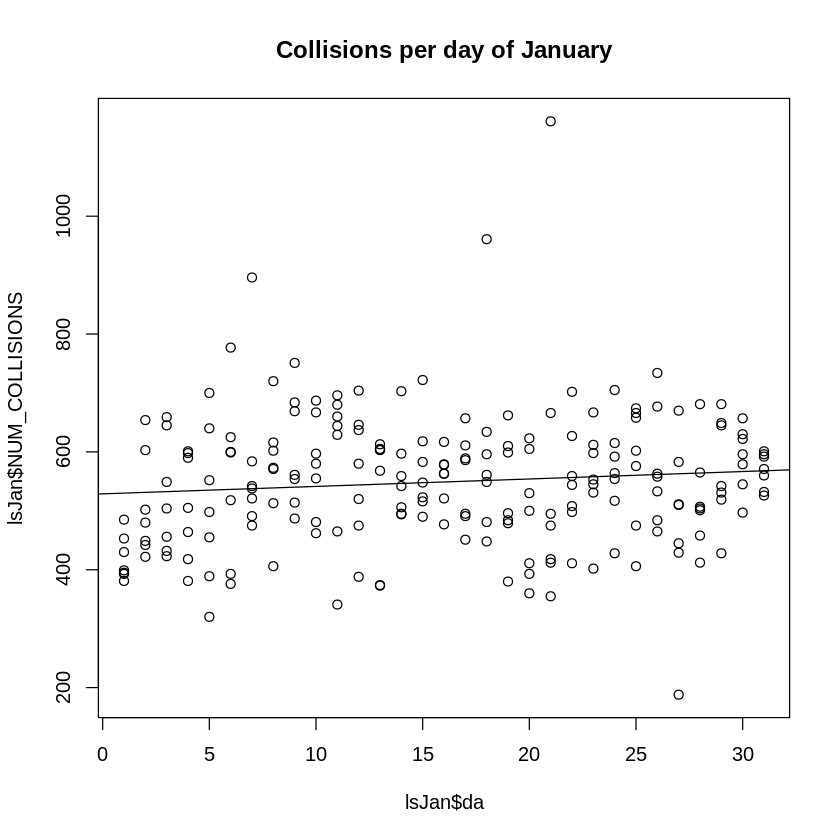

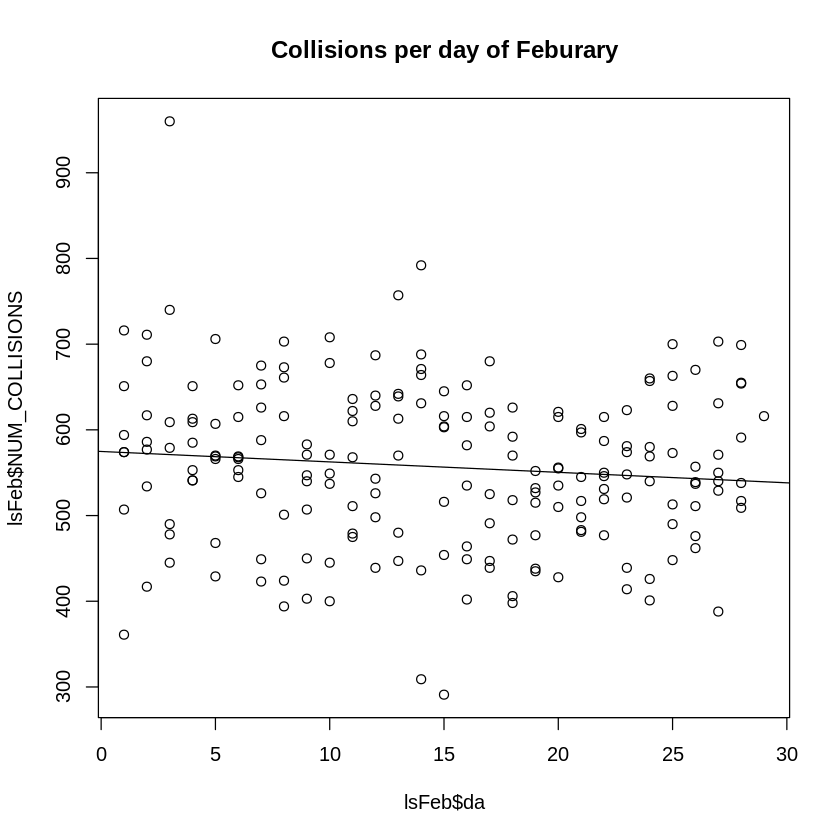

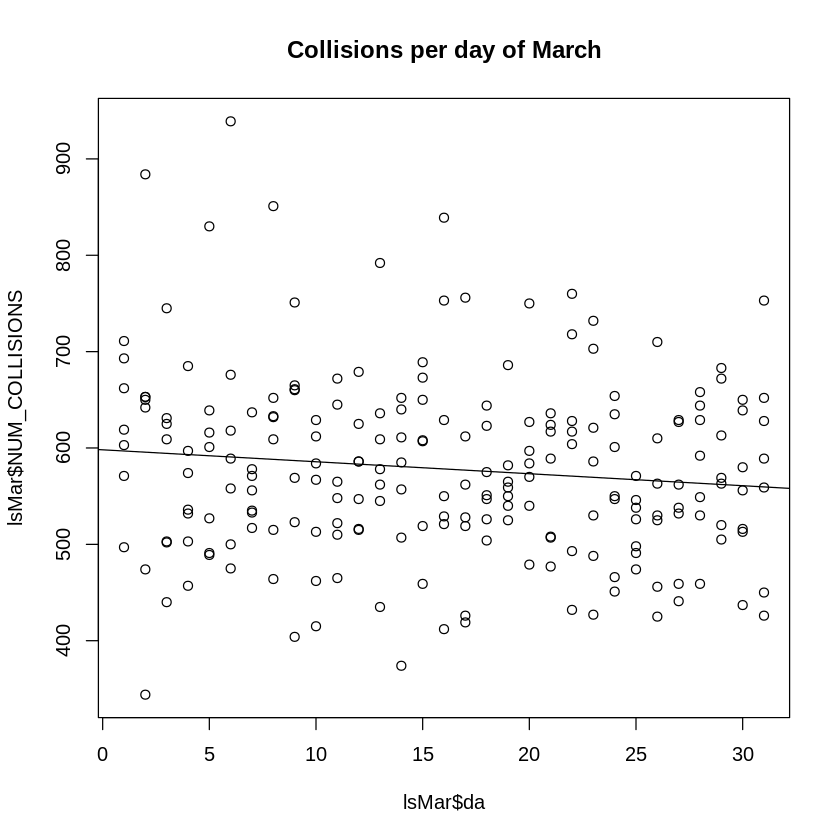

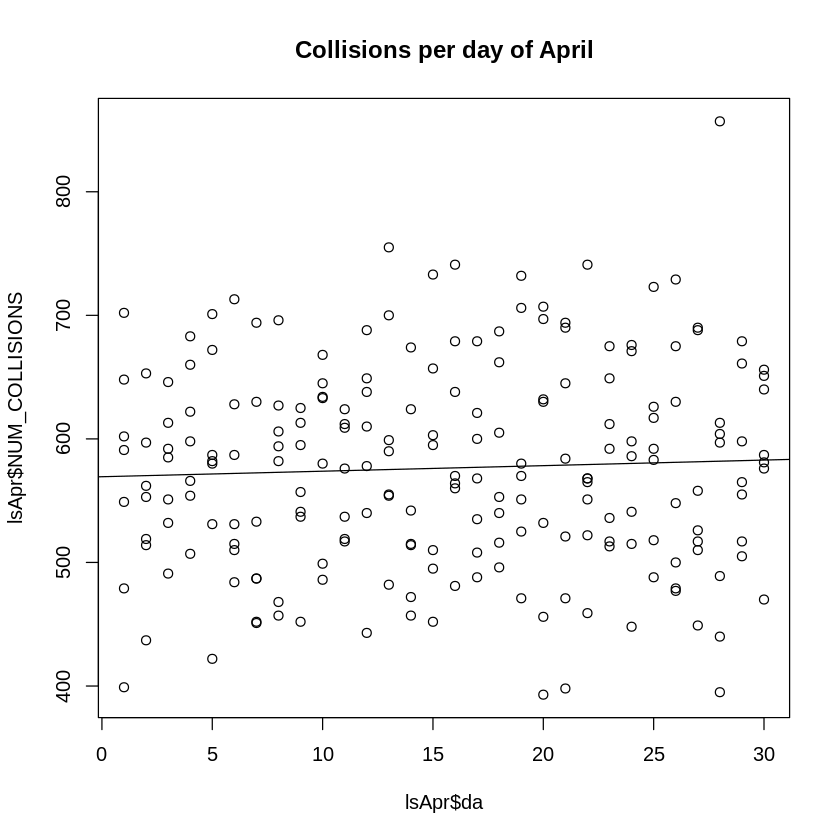

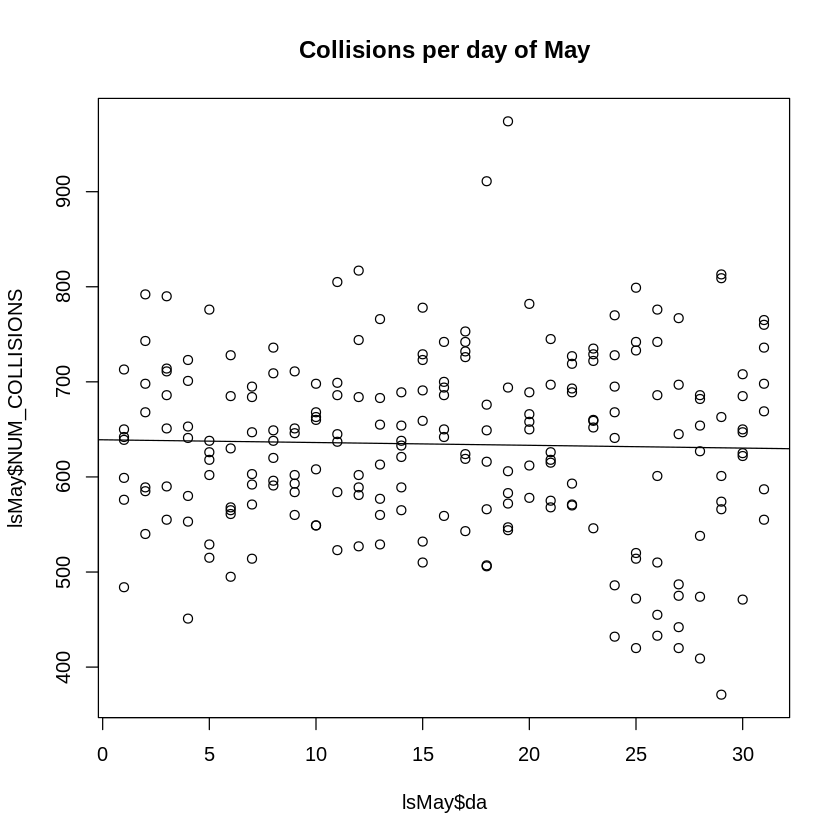

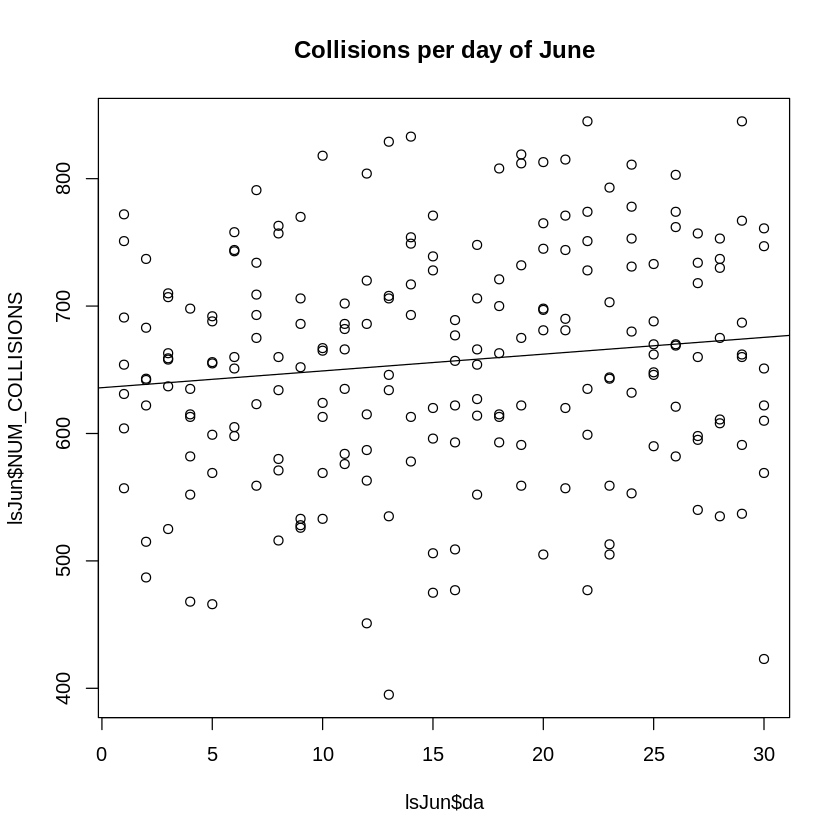

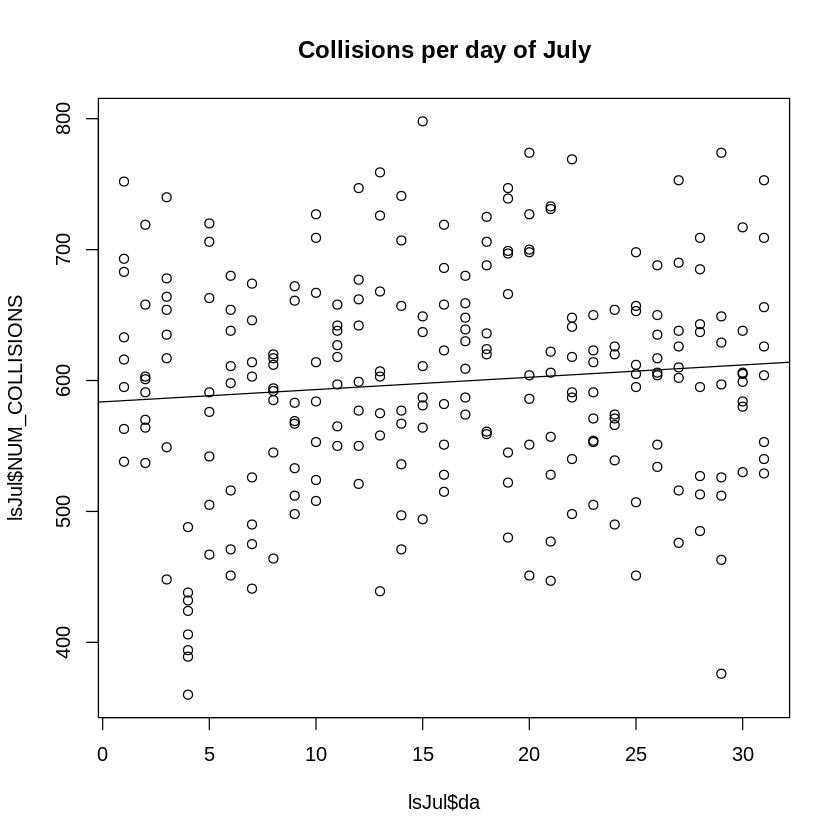

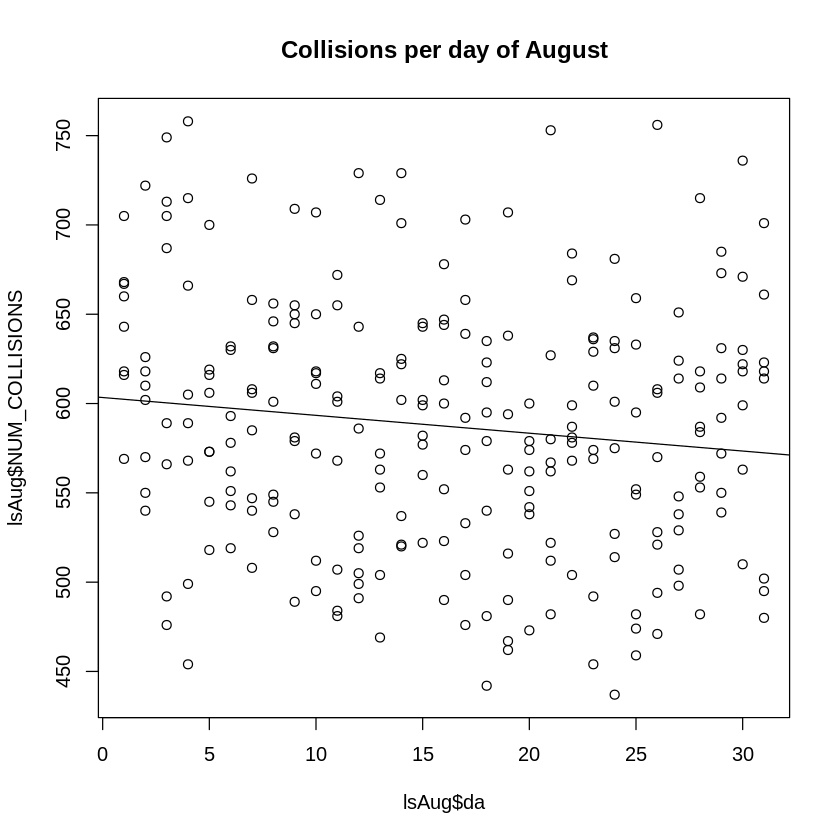

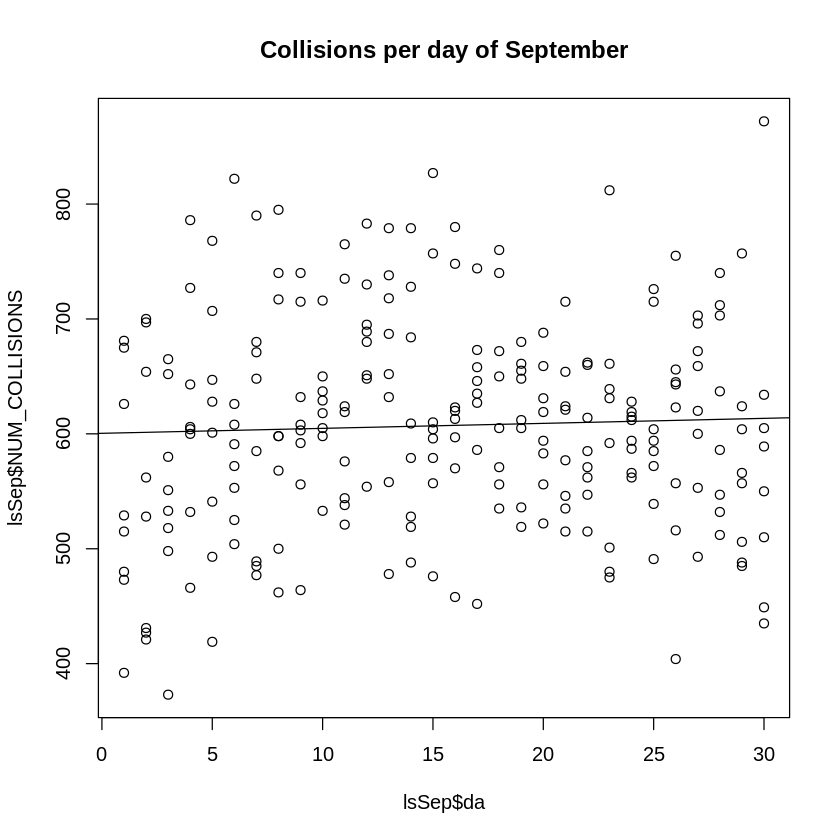

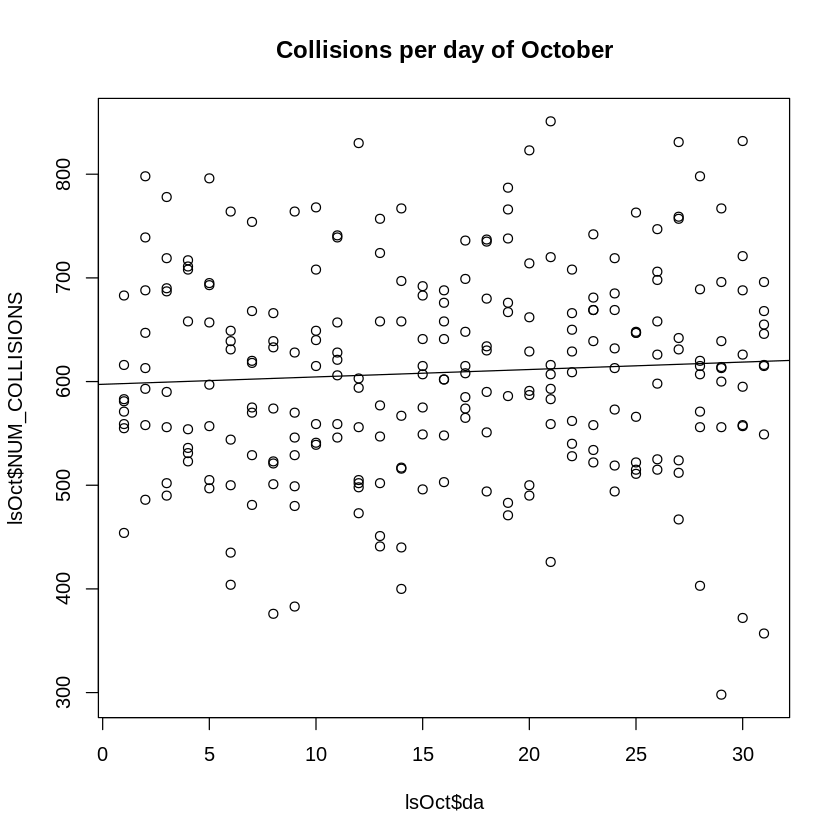

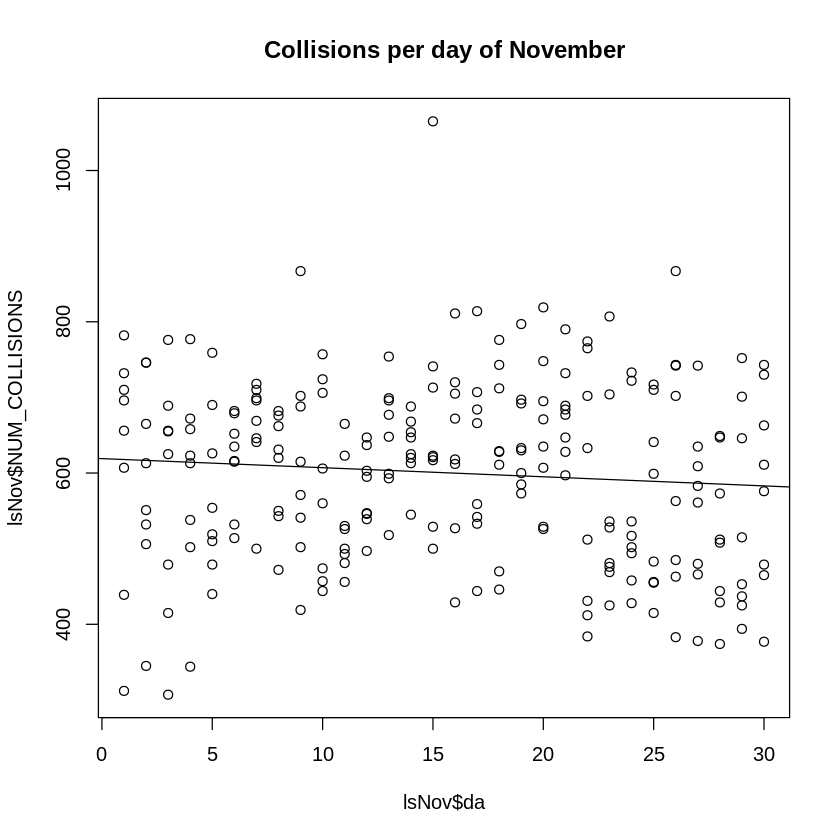

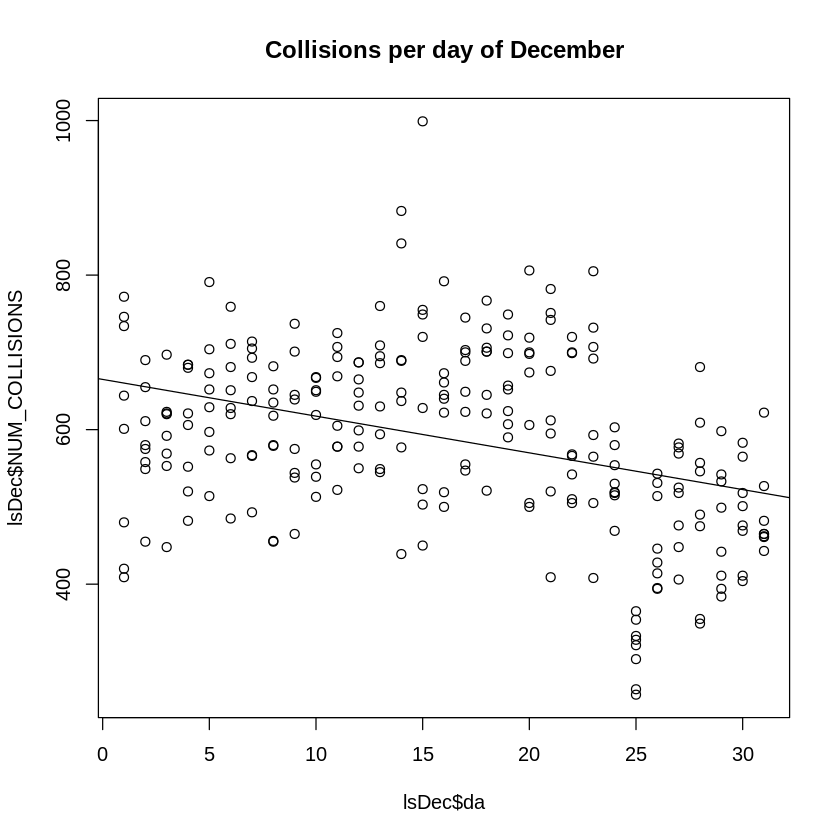

In [10]:
# Collisions over each month
lsJan <- ls2[which(ls2$mo == 1), ]
plot(lsJan$da, lsJan$NUM_COLLISIONS, main="Collisions per day of January")
abline(lm(lsJan$NUM_COLLISIONS ~ lsJan$da))
lsFeb <- ls2[which(ls2$mo == 2), ]
plot(lsFeb$da, lsFeb$NUM_COLLISIONS, main="Collisions per day of Feburary")
abline(lm(lsFeb$NUM_COLLISIONS ~ lsFeb$da))
lsMar <- ls2[which(ls2$mo == 3), ]
plot(lsMar$da, lsMar$NUM_COLLISIONS, main="Collisions per day of March")
abline(lm(lsMar$NUM_COLLISIONS ~ lsMar$da))
lsApr <- ls2[which(ls2$mo == 4), ]
plot(lsApr$da, lsApr$NUM_COLLISIONS, main="Collisions per day of April")
abline(lm(lsApr$NUM_COLLISIONS ~ lsApr$da))
lsMay <- ls2[which(ls2$mo == 5), ]
plot(lsMay$da, lsMay$NUM_COLLISIONS, main="Collisions per day of May")
abline(lm(lsMay$NUM_COLLISIONS ~ lsMay$da))
lsJun <- ls2[which(ls2$mo == 6), ]
plot(lsJun$da, lsJun$NUM_COLLISIONS, main="Collisions per day of June")
abline(lm(lsJun$NUM_COLLISIONS ~ lsJun$da))
lsJul <- ls2[which(ls2$mo == 7), ]
plot(lsJul$da, lsJul$NUM_COLLISIONS, main="Collisions per day of July")
abline(lm(lsJul$NUM_COLLISIONS ~ lsJul$da))
lsAug <- ls2[which(ls2$mo == 8), ]
plot(lsAug$da, lsAug$NUM_COLLISIONS, main="Collisions per day of August")
abline(lm(lsAug$NUM_COLLISIONS ~ lsAug$da))
lsSep <- ls2[which(ls2$mo == 9), ]
plot(lsSep$da, lsSep$NUM_COLLISIONS, main="Collisions per day of September")
abline(lm(lsSep$NUM_COLLISIONS ~ lsSep$da))
lsOct <- ls2[which(ls2$mo == 10), ]
plot(lsOct$da, lsOct$NUM_COLLISIONS, main="Collisions per day of October")
abline(lm(lsOct$NUM_COLLISIONS ~ lsOct$da))
lsNov <- ls2[which(ls2$mo == 11), ]
plot(lsNov$da, lsNov$NUM_COLLISIONS, main="Collisions per day of November")
abline(lm(lsNov$NUM_COLLISIONS ~ lsNov$da))
lsDec <- ls2[which(ls2$mo == 12), ]
plot(lsDec$da, lsDec$NUM_COLLISIONS, main="Collisions per day of December")
abline(lm(lsDec$NUM_COLLISIONS ~ lsDec$da))

Checking each month individually revealed the following correlations -
*   January - Slight positive
*   Feburary - Slight negative
*   March - Slight negative, but appears to be caused by high collision outliers in the first half of the month.
*   April - Slight positive.
*   May - Very slight negative .
*   June - Slight positive.
*   July - Slight positive .
*   August - Negative.
*   September - Slight positive.
*   October - Extremely slight positive.
*   November - Slight negative.
*   December - Strong negative, though this appears to be caused by the large and clear outlier of Christmas day and the lower traffic afterwards.

These observations align with the overall yearly upward trend, but trends throughout each month are unlikely to be a useful data value for prediction due to how messy the trends are, as well as some large outliers possibly damaging prediction models.


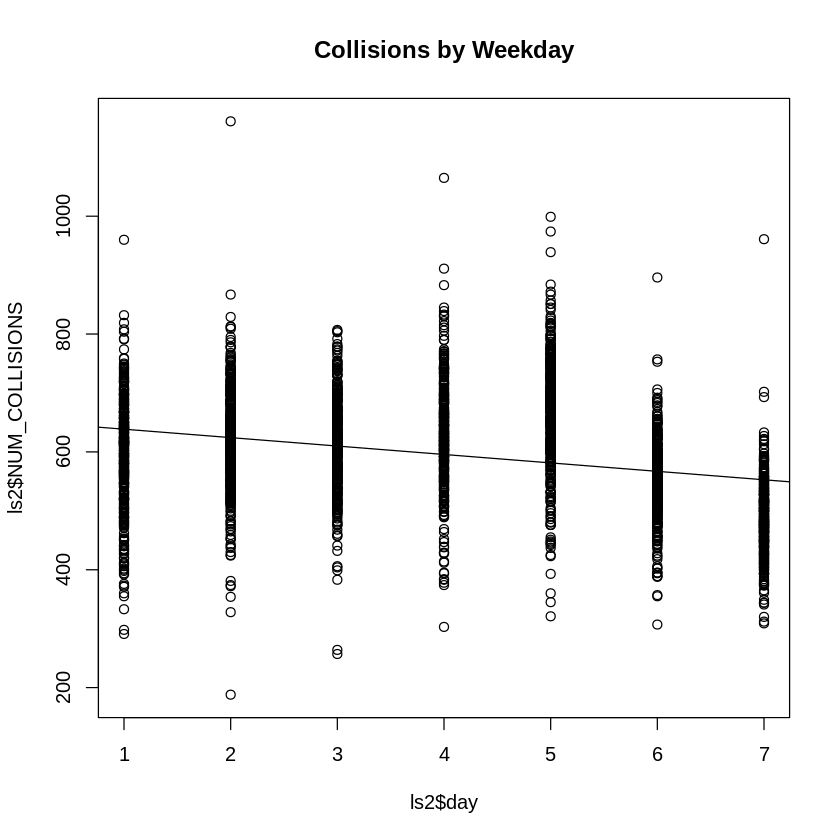

In [11]:
# Collisions by day of week
plot(ls2$day, ls2$NUM_COLLISIONS, main="Collisions by Weekday")
abline(lm(ls2$NUM_COLLISIONS ~ ls2$day))

High values on Thursday and Friday do not prevent a negative trend from existing- the increase on Friday, presumably due to increased traffic at the end of the work and school week, does not stop the overall trend.

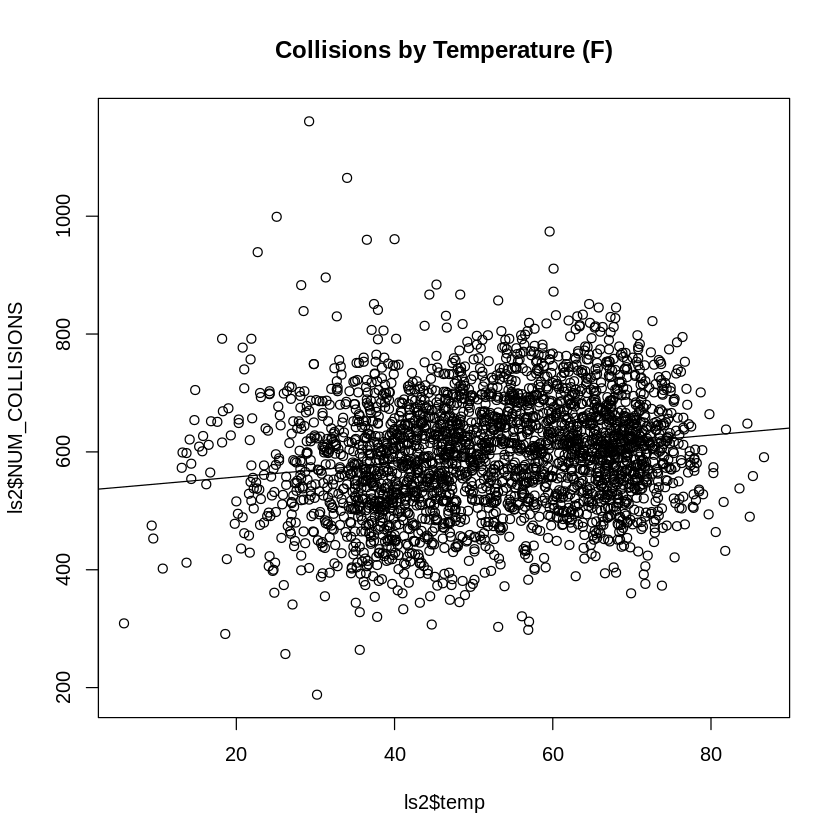

In [12]:
# Collisions by Temperature
plot(ls2$temp, ls2$NUM_COLLISIONS, main="Collisions by Temperature (F)")
abline(lm(ls2$NUM_COLLISIONS ~ ls2$temp))

Mean temperature appears to have a postivive trend. As temperature varies over the seasons, it may be helpful to examine how temperature changes by month.

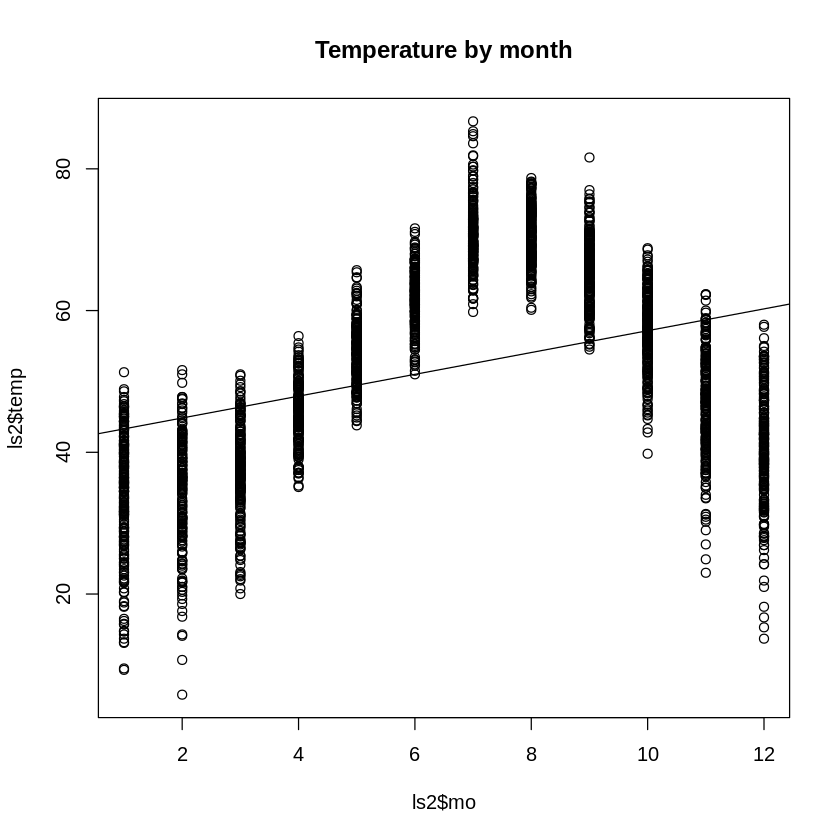

In [13]:
# Temperature over time
plot(ls2$mo, ls2$temp, main="Temperature by month")
abline(lm(ls2$temp ~ ls2$mo))

Plotting temperature over the year, the summer heat and winter chill can be clearly visualised. Despite the large drop during the winter months, a high positive relationship between month and temperature can be observed, which also reflects the increase in collisions by month. However, the relationship between temperature and month is not a simple linear one.

Proceeding to Maximum and Minimum temperature, a similar pattern to Mean Temperature would be expected.

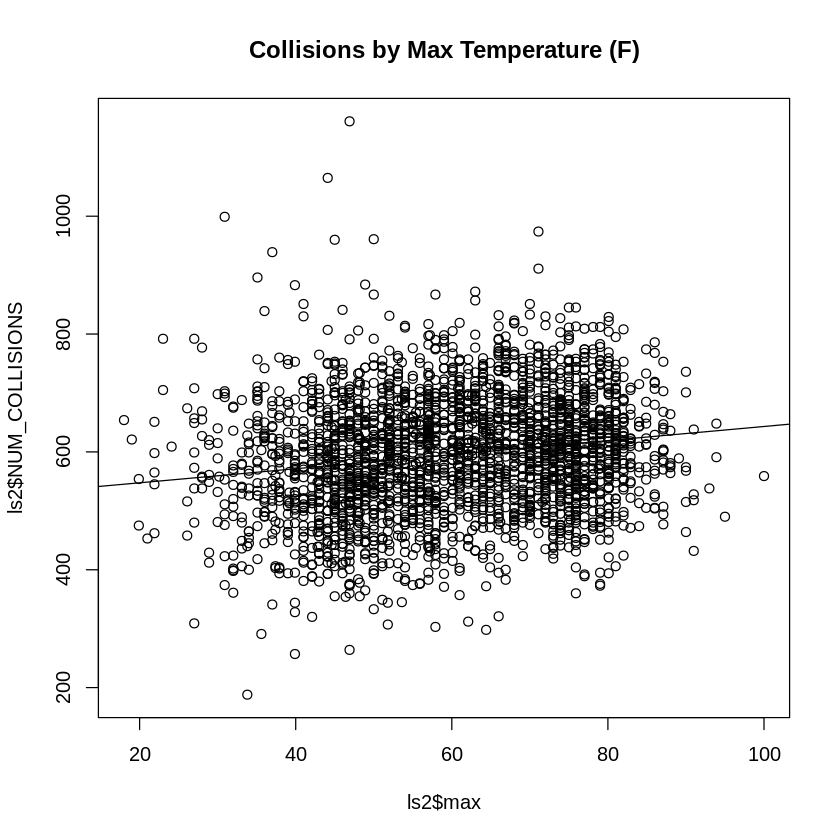

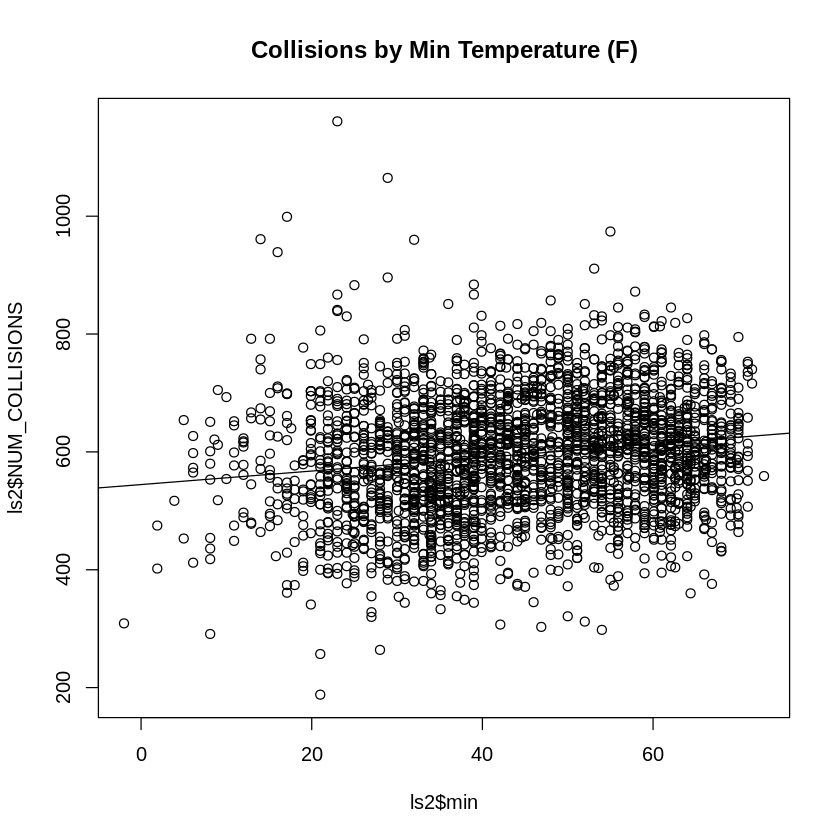

In [14]:
# Collisions by Max Temperature
plot(ls2$max, ls2$NUM_COLLISIONS, main="Collisions by Max Temperature (F)")
abline(lm(ls2$NUM_COLLISIONS ~ ls2$max))
# Collisions by Min Temperature
plot(ls2$min, ls2$NUM_COLLISIONS, main="Collisions by Min Temperature (F)")
abline(lm(ls2$NUM_COLLISIONS ~ ls2$min))

As predicted, max and min temperature reflect the pattern observed in average temperature, a visible positive relationship with the number of collisions. It does not appear that either of the extreme temperature values shows any significantly stronger or weaker relationship with collisions to the average.

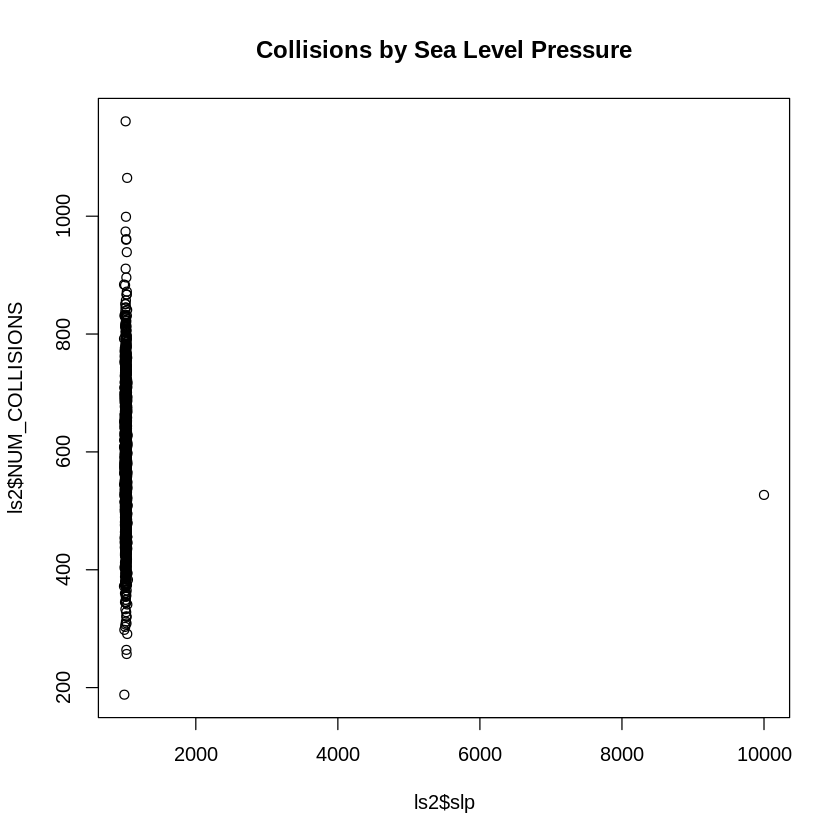

In [15]:
# Collisions by Sea Level Pressure
plot(ls2$slp, ls2$NUM_COLLISIONS, main="Collisions by Sea Level Pressure")

There appears to be a single outlier for pressure rendering the graph illegible. Standard sea level pressure is defined as 1013 millbars (Met Office, 2024), with pressure increasing by approximately 1 atmosphere of pressure for every 10 meters below sea level you travel (NOAA, 1998). Thus it can be safely assumed that the outlier of 10,000mb pressure is due to instrument failure, or someone dropped the gauge into the ocean.

To allow any analysis of the pressure data, the outlier was removed.

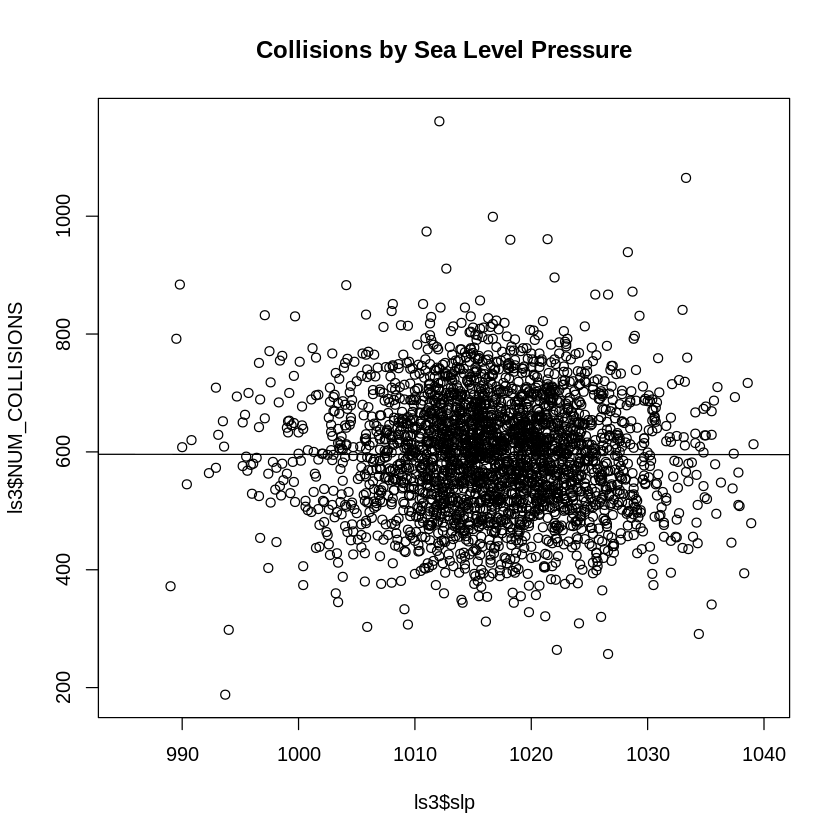

In [16]:
# Collisions by Sea Level Pressure
ls3 <- ls2
plot(ls3$slp, ls3$NUM_COLLISIONS, main="Collisions by Sea Level Pressure", xlim=c(985, 1040))
abline(lm(ls2$NUM_COLLISIONS ~ ls2$slp))

Due to the fairly consistent sea level pressure levels, ranging only around 50 millibars of pressure throughout the data, there does not appear to be any correlation between sea level pressure and the number of collisions.

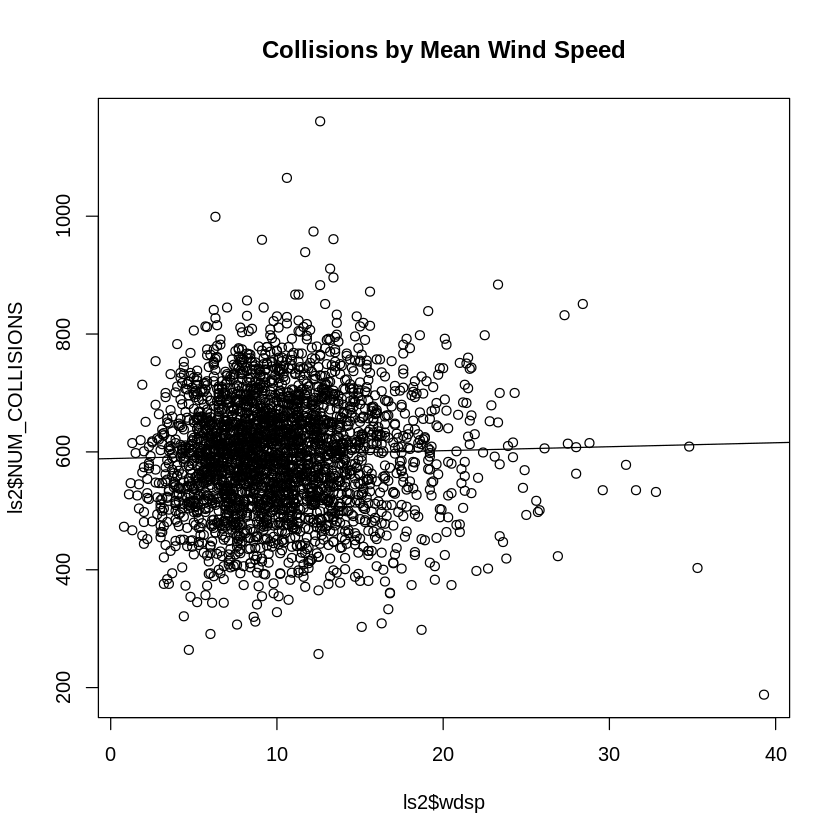

In [17]:
# Collisions by Mean Wind Speed
plot(ls2$wdsp, ls2$NUM_COLLISIONS, main="Collisions by Mean Wind Speed")
abline(lm(ls2$NUM_COLLISIONS ~ ls2$wdsp))

There appears to be a very slight increase in collisions as average wind speed increases, though this is partially due to the higher collision outliers. It does not appear to be a particularly strong correlation. Max wind speed and max gust speed are expected to have similar patterns.

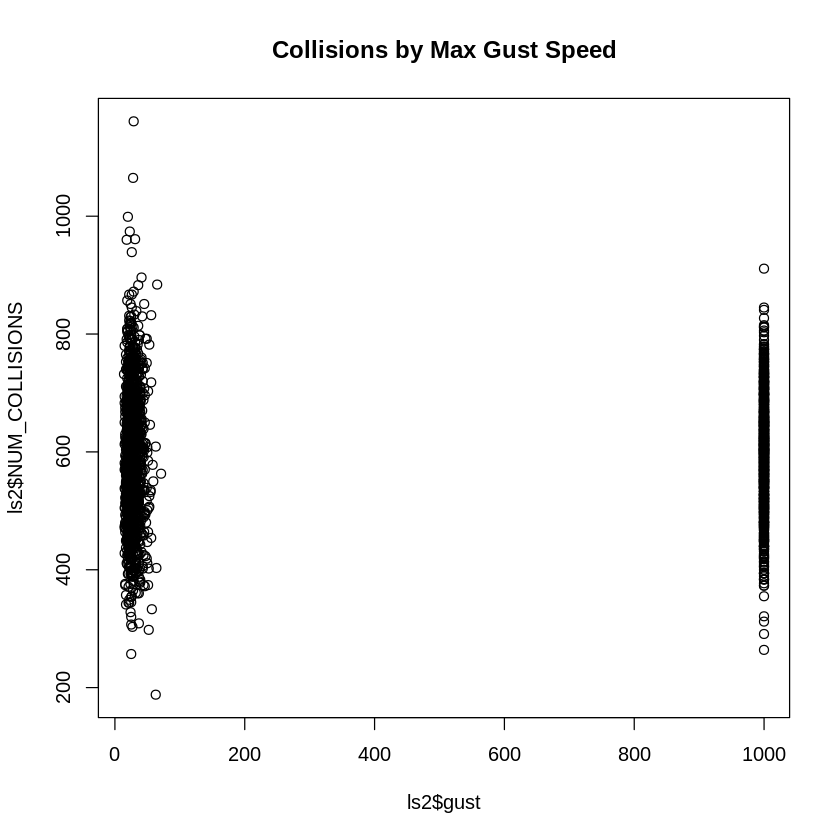

In [18]:
# Collisions by Max Gust Speed
plot(ls2$gust, ls2$NUM_COLLISIONS, main="Collisions by Max Gust Speed")

Max gust appears to have substantial bad data- it has many gust readings at 1000 knots, which are not only far above the recorded record gust speeds for New York of 147mph (Risk Factor, 2024), they eclipse Earths highest recorded wind speeds of around 300 mph and reach the speeds estimated to occur on Saturn (Siegel, 2021). It is safe to assume this data was caused by an instrument failure or lack of data and can be removed.

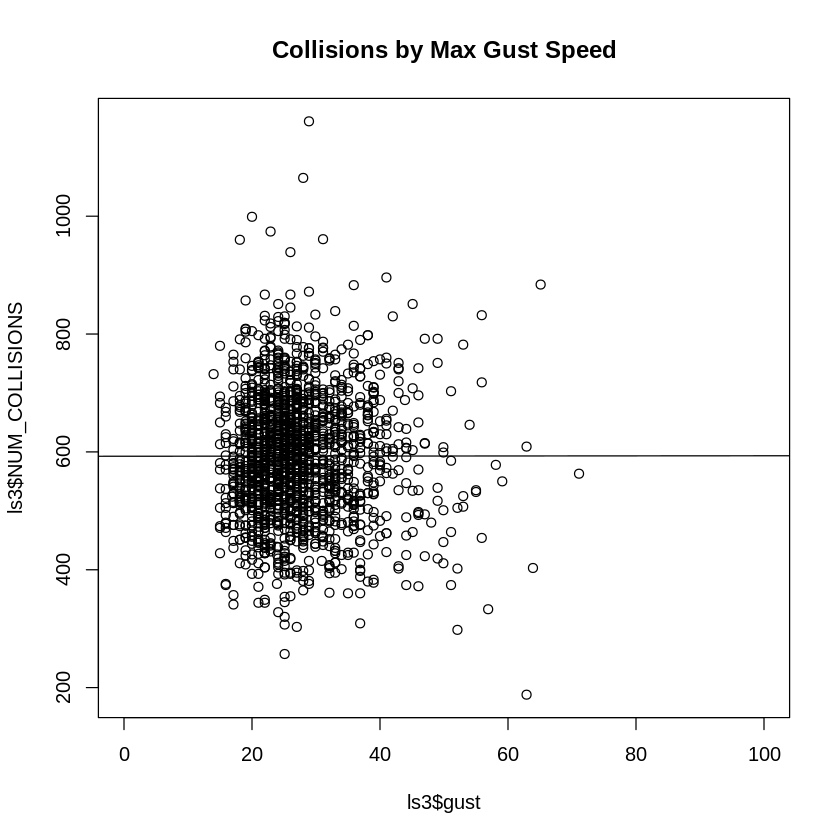

In [19]:
# Collisions by Max Gust Speed
ls3 <- ls2
plot(ls3$gust, ls3$NUM_COLLISIONS, main="Collisions by Max Gust Speed", xlim=c(0, 100))
abline(lm(ls2$NUM_COLLISIONS ~ ls2$gust))

With the outliers removed, there appears to be practically no relationship between gust and collision number, unlike average wind speed.

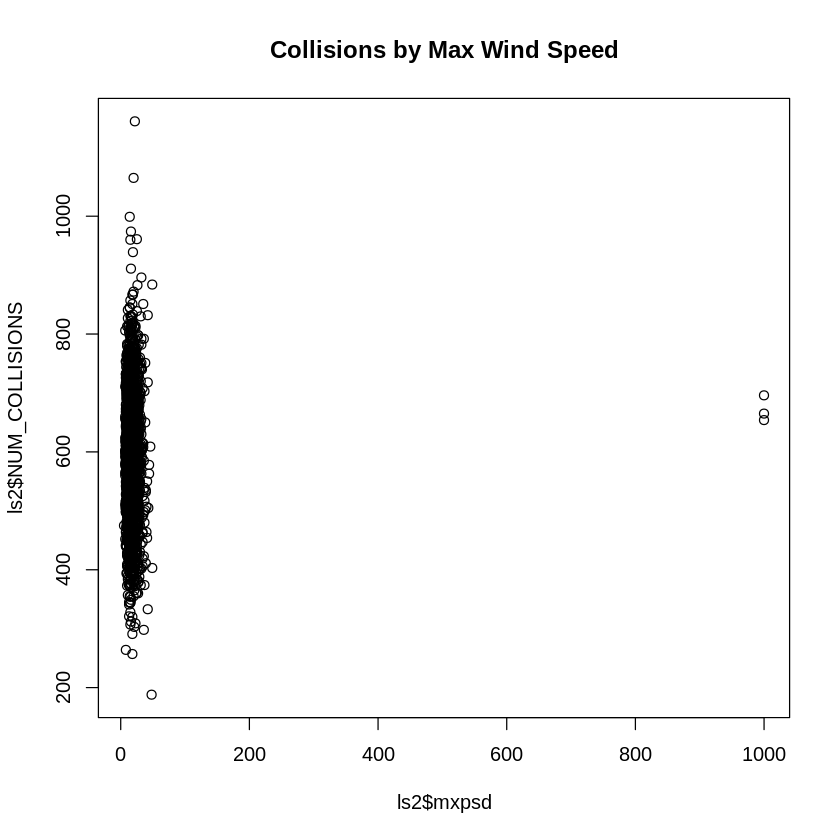

In [20]:
# Collisions by Max Sustained Wind Speed
plot(ls2$mxpsd, ls2$NUM_COLLISIONS, main="Collisions by Max Wind Speed")

Max wind speed has some outliers, though not nearly as many as max gust had. It is likely that days with no data or that maxed out instruments are marked as an impossibly high values to make cleaning easy and avoid accidental removal of real data.

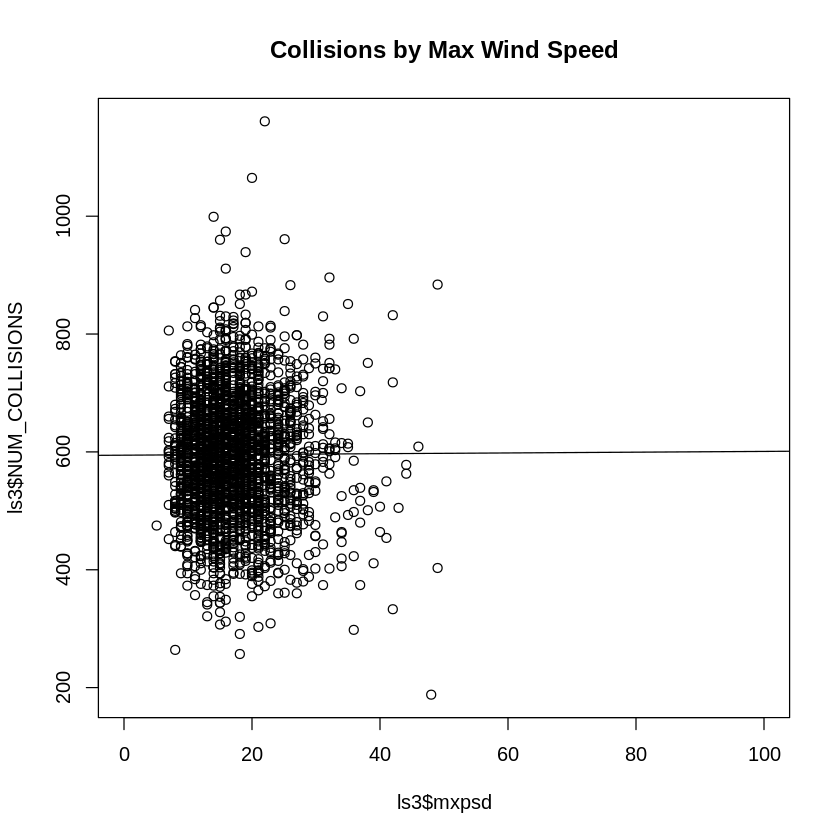

In [21]:
# Collisions by Max Wind Speed
ls3 <- ls2
plot(ls3$mxpsd, ls3$NUM_COLLISIONS, main="Collisions by Max Wind Speed", xlim=c(0, 100))
abline(lm(ls2$NUM_COLLISIONS ~ ls2$mxpsd))

Similarly to gust, there is substantially less visible relationship compared to average wind speed, though there does still appear to be a very slight positive trend for max speed, though it is far too weak to be of use.

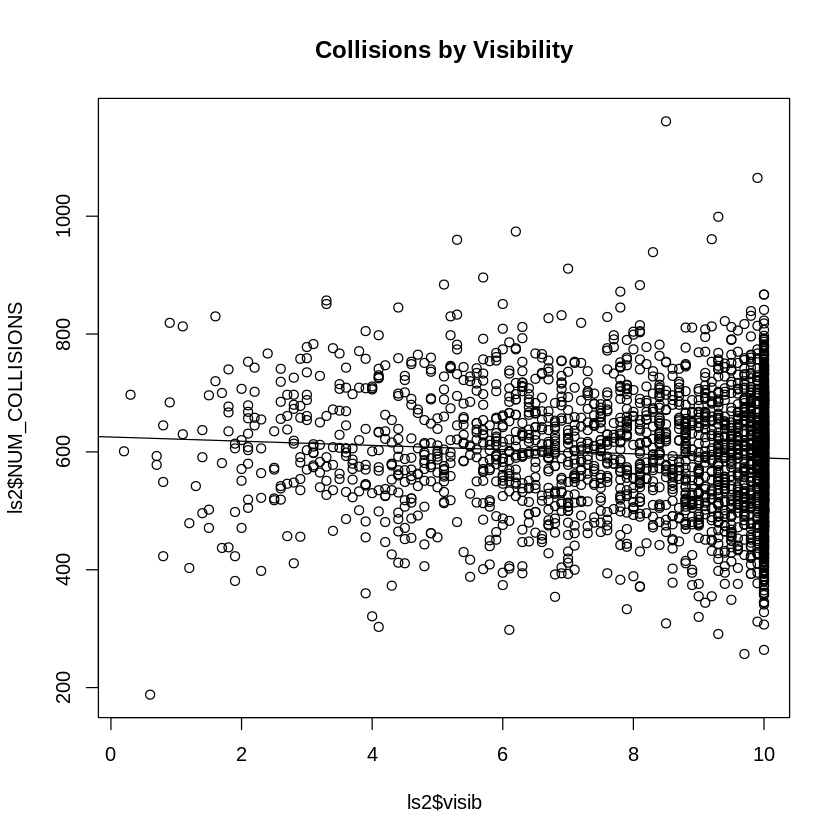

In [22]:
# Collisions by Visibility
plot(ls2$visib, ls2$NUM_COLLISIONS, main="Collisions by Visibility")
abline(lm(ls2$NUM_COLLISIONS ~ ls2$visib))

The majority of days appear to have high visibility, and as visibility increases the number of collisions appears to decrease slightly. This can most likely be attributed to better visibility due to a lack of fog or rain- or rather, as visibility decreases due to weather, collisions increase slightly.

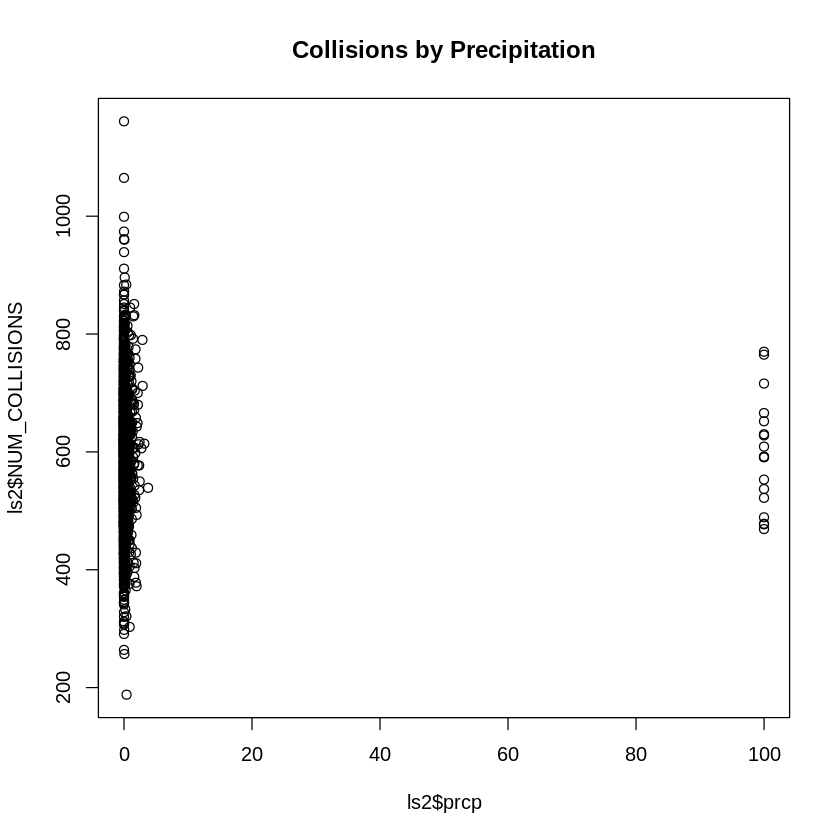

In [23]:
# Collisions by Precipitation
plot(ls2$prcp, ls2$NUM_COLLISIONS, main="Collisions by Precipitation")

As with max wind and gust speed, there are record breaking values recorded- in 2023, 'almost 8 inches' was the most rain since 1948 (Zerkel, Gilbert, & Elamroussi, 2023). 100 inches as a consistent max values is clearly bad data that can be removed.

Removing the bad data will give a clearer indication of any existing relationship.

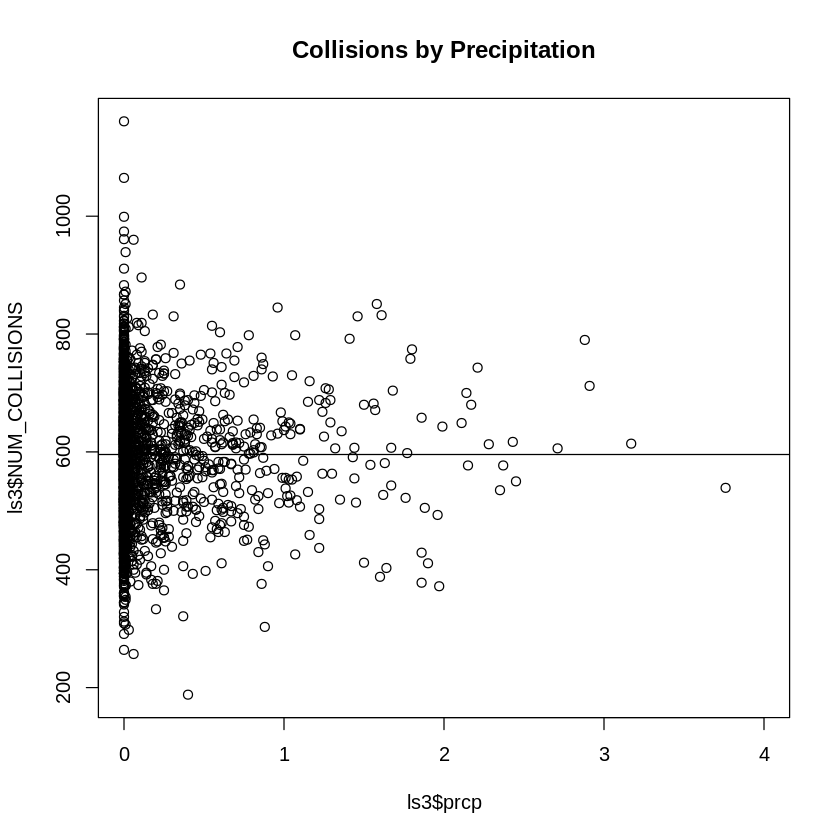

In [24]:
# Collisions by Precipitation
ls3 <- ls2
plot(ls3$prcp, ls3$NUM_COLLISIONS, main="Collisions by Precipitation", xlim=c(0, 4))
abline(lm(ls2$NUM_COLLISIONS ~ ls2$prcp))

As the level of precipitation increases, there appears to be a very slight positive trend. This can most likely be attributed to rainfall reducing traction on roads and visibility for drives.

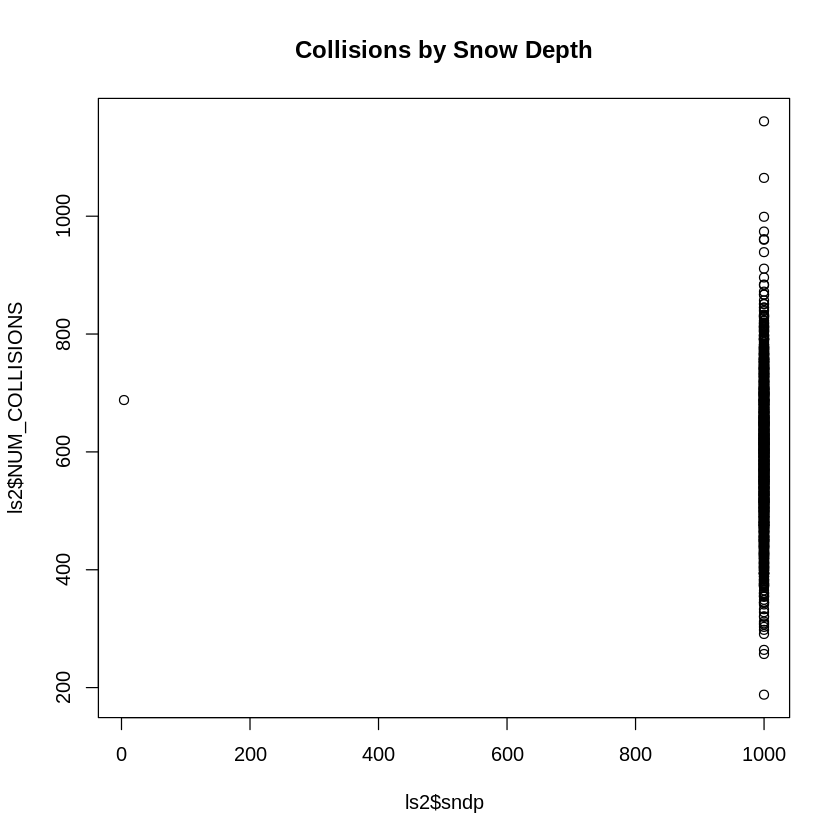

In [25]:
# Collisions by Snow Depth
plot(ls2$sndp, ls2$NUM_COLLISIONS, main="Collisions by Snow Depth")

Snow depth appears completely broken, with almost every value sitting at 1000 inches of snow. A single outlier at 4 inches does nothing to salvage this statistic. Days with no snowfall recorded are most likely logged at the 1000 inch value as bad data- unfortunately, this renders snow depth a useless value for any meaningful observations.

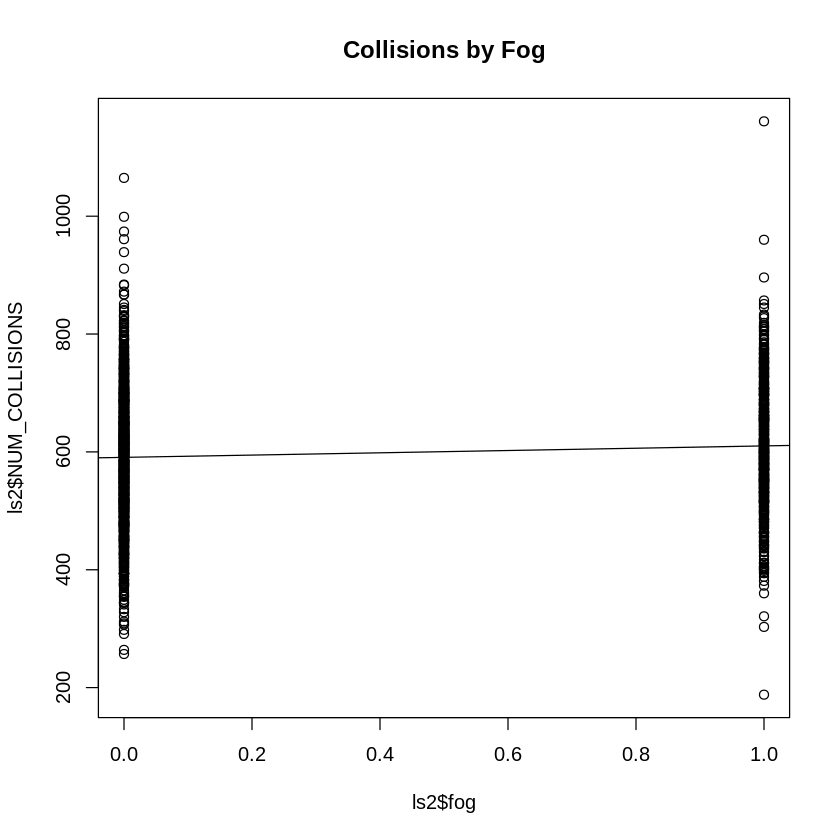

In [99]:
# Collisions by Fog
plot(ls2$fog, ls2$NUM_COLLISIONS, main="Collisions by Fog")
abline(lm(ls2$NUM_COLLISIONS ~ ls2$fog))

As fog is a binary, boolean value of "There is fog" or "There isn't fog", it is impossible to draw any meaningful linear correlation between fog and the number of collisions. Fog may, however, affect other values that affect collisions, or vice versa.

To aid in determining which values have correlation with NUM_COLLISIONS, correlation values are calculated. Positive values close to 1 indicate positive correlation, while negative values close to -1 indicate negative correlation. A value close to 0 indicates little to no correlation.

In [26]:
# Correlations with year, month, day of month, and day of week
cor(ls2$year, ls2$NUM_COLLISIONS)
cor(ls2$mo, ls2$NUM_COLLISIONS)
cor(ls2$da, ls2$NUM_COLLISIONS)
cor(ls2$day, ls2$NUM_COLLISIONS)

[1] 0.2073885

[1] 0.1122295

[1] -0.03452074

[1] -0.285884

In [27]:
# Correlations with mean, maximum and minimum temperature, and sea level pressure
# Adjust data to account for cleaning slp data
ls3 <- ls2[which(ls2$slp <= 2000), ]
cor(ls3$temp, ls3$NUM_COLLISIONS)
cor(ls3$max, ls3$NUM_COLLISIONS)
cor(ls3$min, ls3$NUM_COLLISIONS)
cor(ls3$slp, ls3$NUM_COLLISIONS)

[1] 0.1706749

[1] 0.1735136

[1] 0.1693765

[1] -0.04586813

In [28]:
# Correlations with mean, maximum sustained, and maximum gust wind speed
ls4 <- ls3[which(ls3$gust <= 100), ]
cor(ls4$wdsp, ls4$NUM_COLLISIONS)
cor(ls4$mxpsd, ls4$NUM_COLLISIONS)
cor(ls4$gust, ls4$NUM_COLLISIONS)

[1] 0.04562965

[1] -0.008926996

[1] -0.02439934

In [29]:
# Correlations with visibility, precipitation, snow depth, and fog
ls5 <- ls4[which(ls4$prcp <= 5), ]
cor(ls4$visib, ls4$NUM_COLLISIONS)
cor(ls4$prcp, ls4$NUM_COLLISIONS)
cor(ls4$sndp, ls4$NUM_COLLISIONS)
cor(ls4$fog, ls4$NUM_COLLISIONS)

[1] -0.0654682

[1] -0.0004825744

[1] -0.02181152

[1] 0.06368238

With correlation values never surpassing 0.3, none of the data has particularly strong correlation, but with cleaning the correlations that do exist should strengthen. Comparing the correlation values to the initial plots, the following observations can be made (Correlation values are rounded to two decimal places):

Date
*   Year (0.21) - Slight positive correlation, over time collisions increase. Presumably due to increasing population and traffic.
*   Month (0.11) - Slight positive correlation.
*   Day of Month (-0.03) - Almost no correlation.
*   Day of Week (-0.29)- Slight negative correlation.

Temperature
*   Mean Temperature (0.17) - Slight positive correlation.
*   Max Temperature (0.17) - As Mean Temperature
*   Min Temperature (0.17) - As Mean Temperature
*   Sea Level Pressure (-0.05) - Almost no correlation.

Wind Speed
*   Mean Wind Speed (0.05) - Almost no correlation.
*   Max Sustained Speed (-0.01) - Almost no correlation.
*   Max Gust Speed (-0.02) - Almost no correlation.

Miscellaneous
*   Visibility (-0.07) - Almost no correlation.
*   Precipitation (-0.00) - No correlation.
*   Snow Depth (-0.02) - Almost no correlation.
*   Fog (0.06) - Almost no correlation.

Many values within the data set have next to no correlation to the number of collisions, or provide a near duplicate, unecessary correlation to another value. Some of the values that do have correlation may affect these values, or be affected by them. However, for the purposes of modelling collision data, they serve no purpose:
*   Day of Month
*   Max Temperature
*   Min Temperature
*   Sea Level Pressure
*   Max Sustained Wind Speed
*   Precipitation
*   Snow Depth
*   Fog

They shall be removed from the data set for the final model, but there is no need to remove them yet. They may still be of use for examining the other values.

The values that appear to have useful positive correlation with the number of collisions, and shall thus be the focus going forward, are:
*   Year
*   Month
*   Day of Week
*   Mean Temperature
*   Mean Wind Speed
*   Visibility

Mean Wind Speed and Visibility have very low correlation, but with some further cleaning of the data the correlation may be improved. In addition, the model is to predict collisions based on weather, not just the time of year, so despite their low correlation they can still provide some small support in the model.



# Data Cleaning
Before the data can be used in a prediction model, each value chosen for use in predictions needs further cleaning to maximise the correlation value and trim outliers that could damage the model.

In [30]:
# Current data set
head(ls5)
summary(ls5)

day year mo da collision_date temp slp    visib wdsp mxpsd gust max  min
1  7   2012 7   1 2012-07-01     83.6 1008.9  9.7  4.1   9.9  18.1 93.0 66 
7  6   2012 7   7 2012-07-07     84.9 1010.1  9.5  3.1  14.0  17.1 95.0 70 
8  7   2012 7   8 2012-07-08     80.6 1010.1  8.5  3.1   8.0  15.9 90.0 70 
14 6   2012 7  14 2012-07-14     78.5 1021.6 10.0  3.5  13.0  19.0 82.0 68 
16 1   2012 7  16 2012-07-16     79.0 1011.5  9.2  4.0  14.0  22.0 91.0 70 
17 2   2012 7  17 2012-07-17     84.6 1009.3  9.4  3.5   9.9  18.1 93.9 70 
   prcp sndp  fog NUM_COLLISIONS
1  0.00 999.9 0   538           
7  0.00 999.9 0   490           
8  0.59 999.9 0   464           
14 0.00 999.9 1   536           
16 0.26 999.9 0   528           
17 0.00 999.9 0   648

      day             year            mo               da      
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.0  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 3.000   1st Qu.: 8.0  
 Median :4.000   Median :2016   Median : 6.000   Median :16.0  
 Mean   :4.036   Mean   :2016   Mean   : 6.528   Mean   :15.8  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.0  
 Max.   :7.000   Max.   :2019   Max.   :12.000   Max.   :31.0  
                                                               
    collision_date      temp            slp           visib       
 2012-07-01:   1   Min.   : 5.80   Min.   : 989   Min.   : 0.600  
 2012-07-07:   1   1st Qu.:38.30   1st Qu.:1011   1st Qu.: 7.000  
 2012-07-08:   1   Median :47.35   Median :1015   Median : 9.300  
 2012-07-14:   1   Mean   :48.49   Mean   :1016   Mean   : 8.258  
 2012-07-16:   1   3rd Qu.:59.50   3rd Qu.:1021   3rd Qu.:10.000  
 2012-07-17:   1   Max.   :85.30   Max.   :1039   Max.   :10.000  
 (Other)   :1734   

[1] 0.2073885

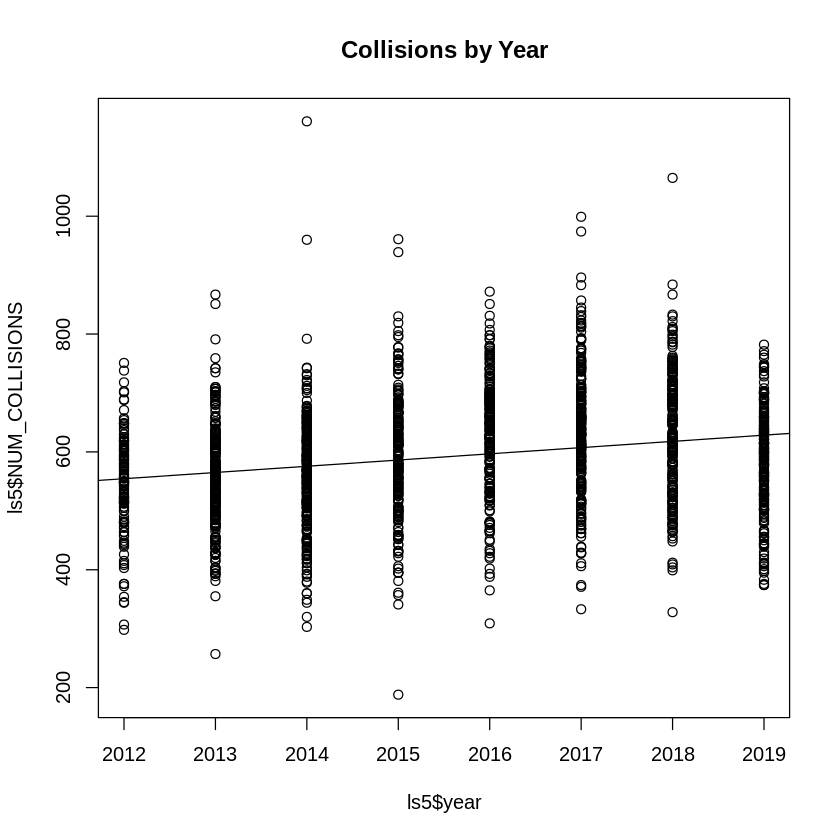

In [31]:
# Year
plot(ls5$NUM_COLLISIONS ~ ls5$year, main="Collisions by Year")
abline(lm(ls5$NUM_COLLISIONS ~ ls5$year))
cor(ls2$year, ls2$NUM_COLLISIONS)

As there is a slight increase in collisions year by year, trimming overall outliers risks taking off genuine values from earlier or later years, so each year must be trimmed individually. To accomplish this the data from each year is separated into its own dataset.

In [32]:
#2012
ls2012 <- ls5[which(ls5$year == 2012), ]
dayofyear <- 1*seq_len(nrow(ls2012))
dayindex <- 1*seq_len(nrow(ls2012))
ls2012a <- cbind(dayindex, dayofyear, ls2012)

In [33]:
#2013
ls2013 <- ls5[which(ls5$year == 2013), ]
dayofyear <- 1*seq_len(nrow(ls2013))
dayindex <- 1*seq_len(nrow(ls2013)) + 184
ls2013a <- cbind(dayindex, dayofyear, ls2013)

In [34]:
#2014
ls2014 <- ls5[which(ls5$year == 2014), ]
dayofyear <- 1*seq_len(nrow(ls2014))
dayindex <- 1*seq_len(nrow(ls2014)) + 549
ls2014a <- cbind(dayindex, dayofyear, ls2014)

In [35]:
#2015
ls2015 <- ls5[which(ls5$year == 2015), ]
dayofyear <- 1*seq_len(nrow(ls2015))
dayindex <- 1*seq_len(nrow(ls2015)) + 914
ls2015a <- cbind(dayindex, dayofyear, ls2015)

In [36]:
#2016
ls2016 <- ls5[which(ls5$year == 2016), ]
dayofyear <- 1*seq_len(nrow(ls2016))
dayindex <- 1*seq_len(nrow(ls2016)) + 1279
ls2016a <- cbind(dayindex, dayofyear, ls2016)

In [37]:
#2017
ls2017 <- ls5[which(ls5$year == 2017), ]
dayofyear <- 1*seq_len(nrow(ls2017))
dayindex <- 1*seq_len(nrow(ls2017)) + 1645
ls2017a <- cbind(dayindex, dayofyear, ls2017)

In [38]:
#2018
ls2018 <- ls5[which(ls5$year == 2018), ]
dayofyear <- 1*seq_len(nrow(ls2018))
dayindex <- 1*seq_len(nrow(ls2018)) + 2010
ls2018a <- cbind(dayindex, dayofyear, ls2018)

In [39]:
#2019
ls2019 <- ls5[which(ls5$year == 2019), ]
dayofyear <- 1*seq_len(nrow(ls2019))
dayindex <- 1*seq_len(nrow(ls2019)) + 2375
ls2019a <- cbind(dayindex, dayofyear, ls2019)

In [40]:
library(ggplot2)

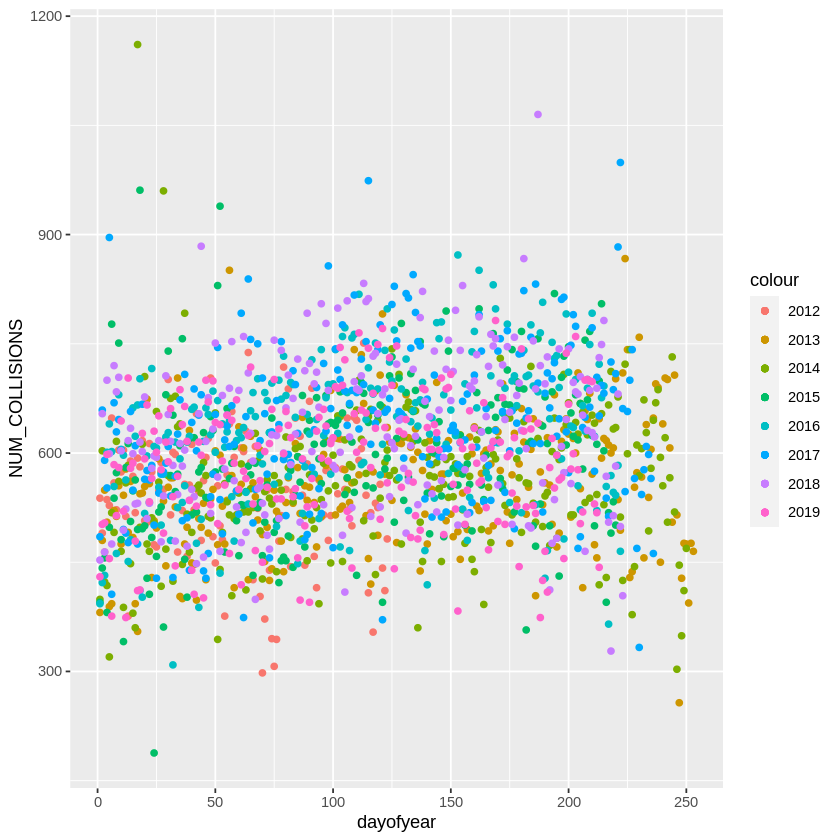

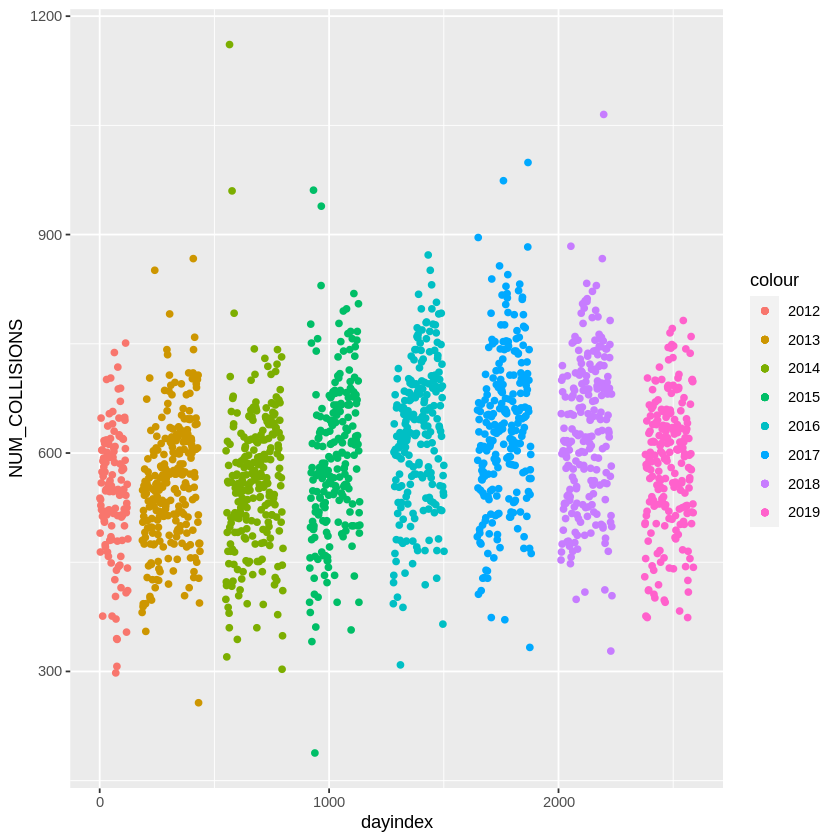

In [41]:
ggplot() +
  geom_point(data=ls2012a, aes(dayofyear, NUM_COLLISIONS, color="2012")) +
  geom_point(data=ls2013a, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data=ls2014a, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data=ls2015a, aes(dayofyear, NUM_COLLISIONS, color="2015")) +
  geom_point(data=ls2016a, aes(dayofyear, NUM_COLLISIONS, color="2016")) +
  geom_point(data=ls2017a, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data=ls2018a, aes(dayofyear, NUM_COLLISIONS, color="2018")) +
  geom_point(data=ls2019a, aes(dayofyear, NUM_COLLISIONS, color="2019"))

ggplot() +
  geom_point(data=ls2012a, aes(dayindex, NUM_COLLISIONS, color="2012")) +
  geom_point(data=ls2013a, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=ls2014a, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=ls2015a, aes(dayindex, NUM_COLLISIONS, color="2015")) +
  geom_point(data=ls2016a, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=ls2017a, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=ls2018a, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=ls2019a, aes(dayindex, NUM_COLLISIONS, color="2019"))

The yearly increase in collisions is clearly visible- though 2019 does go against the trend somewhat. To clean the year data, overall outliers will be removed first, before each year is cleaned individually.

First, the overall outliers above 900 and below 300 are removed as these threshholds trim the most extreme outliers from all years.

In [42]:
ls2012b <- ls2012a[which(ls2012a$NUM_COLLISIONS <= 900), ]
ls2013b <- ls2013a[which(ls2013a$NUM_COLLISIONS <= 900), ]
ls2014b <- ls2014a[which(ls2014a$NUM_COLLISIONS <= 900), ]
ls2015b <- ls2015a[which(ls2015a$NUM_COLLISIONS <= 900), ]
ls2016b <- ls2016a[which(ls2016a$NUM_COLLISIONS <= 900), ]
ls2017b <- ls2017a[which(ls2017a$NUM_COLLISIONS <= 900), ]
ls2018b <- ls2018a[which(ls2018a$NUM_COLLISIONS <= 900), ]
ls2019b <- ls2019a[which(ls2019a$NUM_COLLISIONS <= 900), ]

ls2012c <- ls2012b[which(ls2012b$NUM_COLLISIONS >= 300), ]
ls2013c <- ls2013a[which(ls2013a$NUM_COLLISIONS >= 300), ]
ls2014c <- ls2014a[which(ls2014a$NUM_COLLISIONS >= 300), ]
ls2015c <- ls2015a[which(ls2015a$NUM_COLLISIONS >= 300), ]
ls2016c <- ls2016a[which(ls2016a$NUM_COLLISIONS >= 300), ]
ls2017c <- ls2017a[which(ls2017a$NUM_COLLISIONS >= 300), ]
ls2018c <- ls2018a[which(ls2018a$NUM_COLLISIONS >= 300), ]
ls2019c <- ls2019a[which(ls2019a$NUM_COLLISIONS >= 300), ]

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


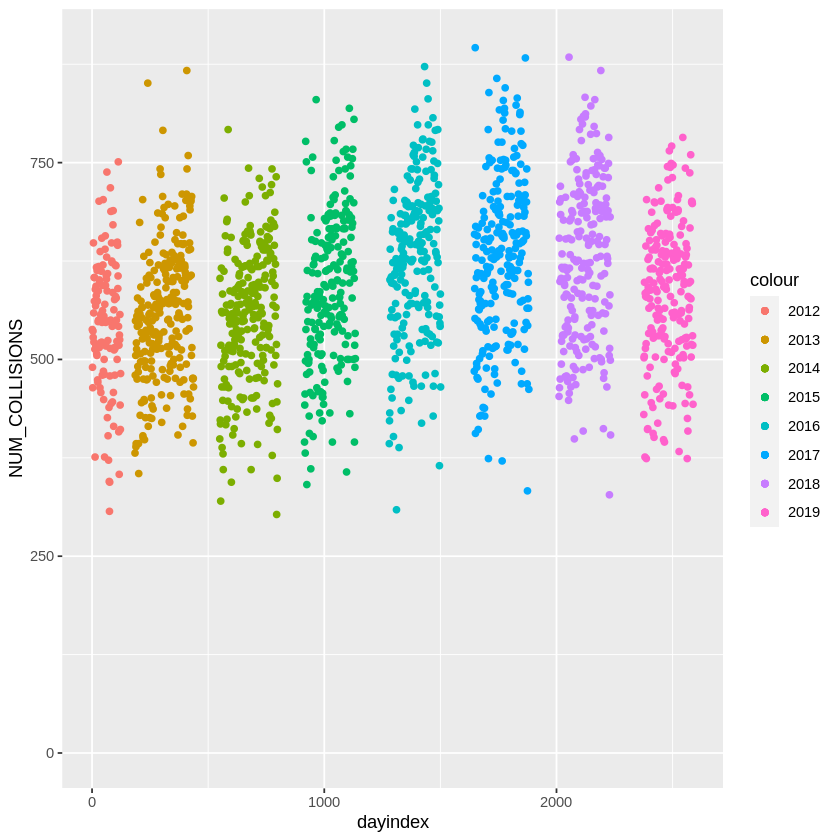

In [43]:
sp <- ggplot() +
  geom_point(data=ls2012c, aes(dayindex, NUM_COLLISIONS, color="2012")) +
  geom_point(data=ls2013c, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=ls2014c, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=ls2015c, aes(dayindex, NUM_COLLISIONS, color="2015")) +
  geom_point(data=ls2016c, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=ls2017c, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=ls2018c, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=ls2019c, aes(dayindex, NUM_COLLISIONS, color="2019"))

sp+ylim(0, 900)

Each year was examined individually, with upper and lower limits chosen based on the years outlying values.

In [44]:
ls2012d <- ls2012c[which(ls2012c$NUM_COLLISIONS <= 720), ]
ls2012e <- ls2012d[which(ls2012d$NUM_COLLISIONS >= 400), ]
ls2013d <- ls2013c[which(ls2013c$NUM_COLLISIONS <= 740), ]
ls2013e <- ls2013d[which(ls2013d$NUM_COLLISIONS >= 400), ]
ls2014d <- ls2014c[which(ls2014c$NUM_COLLISIONS <= 740), ]
ls2014e <- ls2014d[which(ls2014d$NUM_COLLISIONS >= 400), ]
ls2015d <- ls2015c[which(ls2015c$NUM_COLLISIONS <= 780), ]
ls2015e <- ls2015d[which(ls2015d$NUM_COLLISIONS >= 400), ]
ls2016d <- ls2016c[which(ls2016c$NUM_COLLISIONS <= 800), ]
ls2016e <- ls2016d[which(ls2016d$NUM_COLLISIONS >= 430), ]
ls2017d <- ls2017c[which(ls2017c$NUM_COLLISIONS <= 850), ]
ls2017e <- ls2017d[which(ls2017d$NUM_COLLISIONS >= 450), ]
ls2018d <- ls2018c[which(ls2018c$NUM_COLLISIONS <= 850), ]
ls2018e <- ls2018d[which(ls2018d$NUM_COLLISIONS >= 450), ]
ls2019d <- ls2019c[which(ls2019c$NUM_COLLISIONS <= 800), ]
ls2019e <- ls2019d[which(ls2019d$NUM_COLLISIONS >= 400), ]

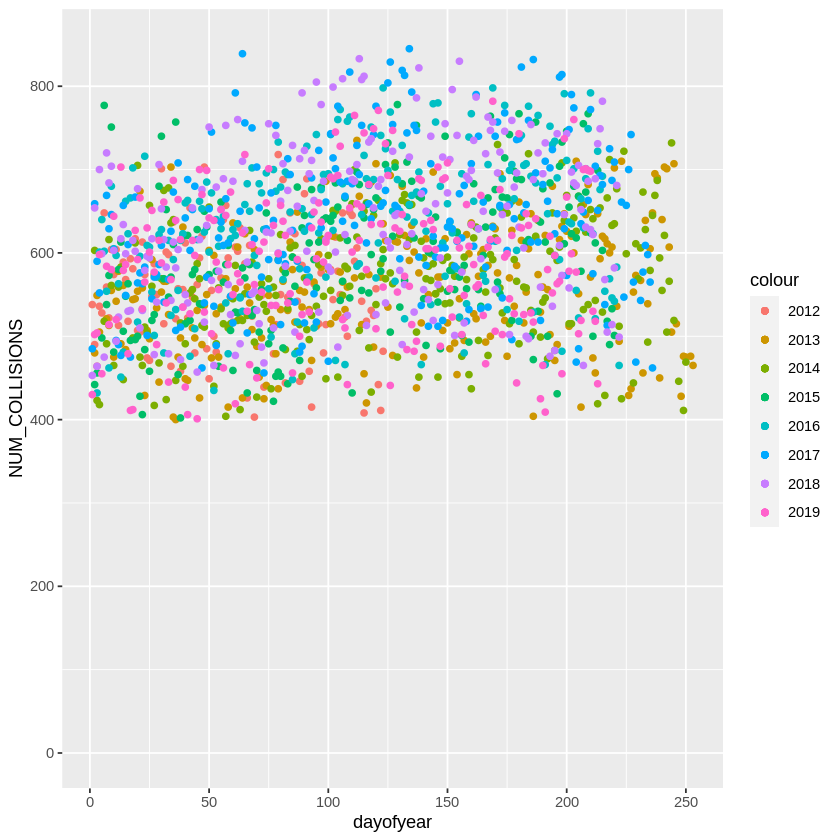

In [45]:
sp <- ggplot() +
  geom_point(data=ls2012e, aes(dayofyear, NUM_COLLISIONS, color="2012")) +
  geom_point(data=ls2013e, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data=ls2014e, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data=ls2015e, aes(dayofyear, NUM_COLLISIONS, color="2015")) +
  geom_point(data=ls2016e, aes(dayofyear, NUM_COLLISIONS, color="2016")) +
  geom_point(data=ls2017e, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data=ls2018e, aes(dayofyear, NUM_COLLISIONS, color="2018")) +
  geom_point(data=ls2019e, aes(dayofyear, NUM_COLLISIONS, color="2019"))

sp+ylim(0, 850)

Due to the yearly increase and pattern, the data should be scaled. Scaling the values to a standard data range will allow for models to predict values that can then be scaled to whatever range is needed. This enables the data to fit a wider range of models compared to unscaled data, as not all algorithms can properly function with unnormalised data (Lanigan, Raschka, & Amor, 2024).

Scaling of this data set will be done using normalisation, rescaling the values from 0 to 1 using the formula (𝑥 −𝑥𝑚𝑖𝑛)/(𝑥𝑚𝑎𝑥 −𝑥𝑚𝑖𝑛). This will ensure that each years values are weighted equally in predictions, and allow for predictions for any given year when provided an inverse scale during modelling.

In [46]:
# Normalisation => (𝑥 −𝑥𝑚𝑖𝑛)/(𝑥𝑚𝑎𝑥 −𝑥𝑚𝑖𝑛)
summary(ls2012e$NUM_COLLISIONS)
ls2012e$NUM_COLLISIONS <- (ls2012e$NUM_COLLISIONS-403)/(718 - 403)
summary(ls2013e$NUM_COLLISIONS)
ls2013e$NUM_COLLISIONS <- (ls2013e$NUM_COLLISIONS-400)/(735 - 400)
summary(ls2014e$NUM_COLLISIONS)
ls2014e$NUM_COLLISIONS <- (ls2014e$NUM_COLLISIONS-404)/(732 - 404)
summary(ls2015e$NUM_COLLISIONS)
ls2015e$NUM_COLLISIONS <- (ls2015e$NUM_COLLISIONS-402)/(778 - 402)
summary(ls2016e$NUM_COLLISIONS)
ls2016e$NUM_COLLISIONS <- (ls2016e$NUM_COLLISIONS-432)/(798 - 432)
summary(ls2017e$NUM_COLLISIONS)
ls2017e$NUM_COLLISIONS <- (ls2017e$NUM_COLLISIONS-456)/(845 - 456)
summary(ls2018e$NUM_COLLISIONS)
ls2018e$NUM_COLLISIONS <- (ls2018e$NUM_COLLISIONS-453)/(833 - 453)
summary(ls2019e$NUM_COLLISIONS)
ls2019e$NUM_COLLISIONS <- (ls2019e$NUM_COLLISIONS-401)/(782 - 401)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  403.0   513.0   550.0   554.3   604.0   718.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  400.0   506.0   557.0   558.4   613.5   735.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  404.0   512.0   566.0   563.6   619.0   732.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  402.0   530.0   592.0   592.5   657.0   778.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    432     569     637     630     692     798 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  456.0   571.0   637.0   636.7   700.0   845.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  453.0   556.0   628.5   631.5   703.0   833.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  401.0   528.5   597.0   590.1   646.5   782.0 

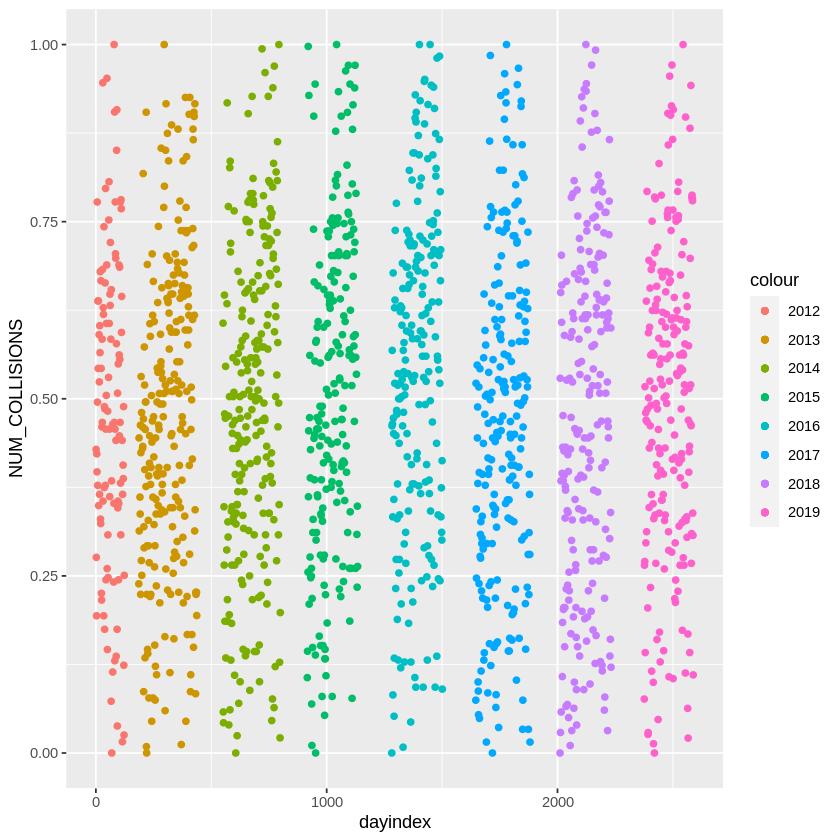

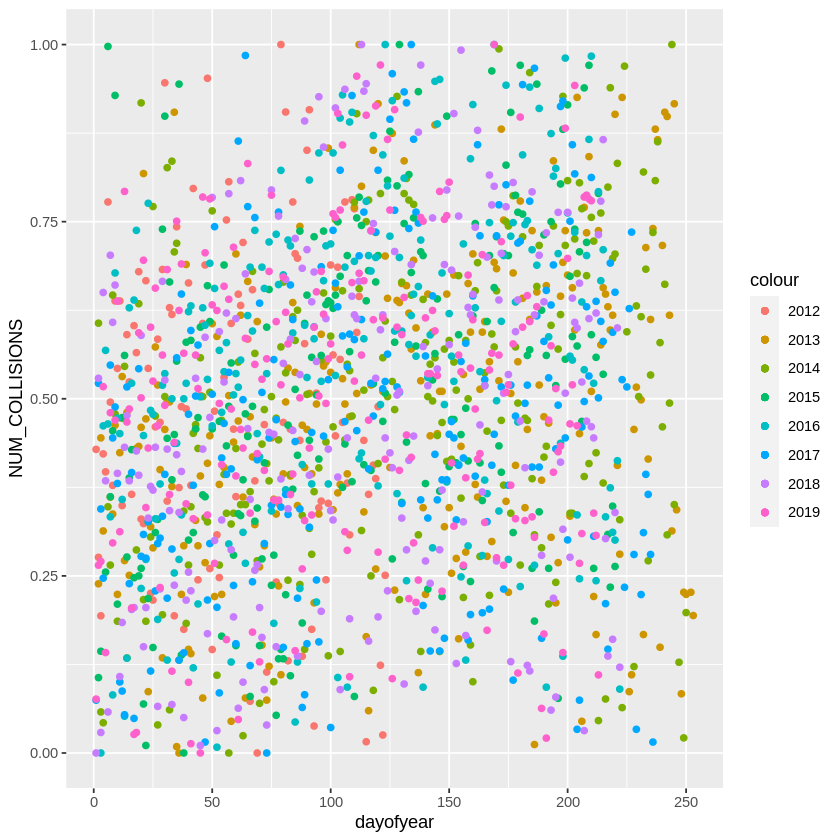

In [47]:
sp <- ggplot() +
  geom_point(data=ls2012e, aes(dayindex, NUM_COLLISIONS, color="2012")) +
  geom_point(data=ls2013e, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=ls2014e, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=ls2015e, aes(dayindex, NUM_COLLISIONS, color="2015")) +
  geom_point(data=ls2016e, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=ls2017e, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=ls2018e, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=ls2019e, aes(dayindex, NUM_COLLISIONS, color="2019"))

sp+ylim(0, 1)

sp <- ggplot() +
  geom_point(data=ls2012e, aes(dayofyear, NUM_COLLISIONS, color="2012")) +
  geom_point(data=ls2013e, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data=ls2014e, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data=ls2015e, aes(dayofyear, NUM_COLLISIONS, color="2015")) +
  geom_point(data=ls2016e, aes(dayofyear, NUM_COLLISIONS, color="2016")) +
  geom_point(data=ls2017e, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data=ls2018e, aes(dayofyear, NUM_COLLISIONS, color="2018")) +
  geom_point(data=ls2019e, aes(dayofyear, NUM_COLLISIONS, color="2019"))

sp+ylim(0, 1)

Every collision value from every year is now scaled to be between 0 and 1, as the data has been correctly normalised. This does render year useless as a metric to predict the number of collisions on, but that was expected.

The different years data is now merged back into a single data set.

In [48]:
lsEcomb <- rbind(ls2012e, ls2013e, ls2014e, ls2015e, ls2016e, ls2017e, ls2018e, ls2019e)
lsEcomb

dayindex dayofyear day year mo da collision_date temp slp    visib wdsp
1     1        1        7   2012 7   1 2012-07-01     83.6 1008.9  9.7  4.1 
7     2        2        6   2012 7   7 2012-07-07     84.9 1010.1  9.5  3.1 
8     3        3        7   2012 7   8 2012-07-08     80.6 1010.1  8.5  3.1 
14    4        4        6   2012 7  14 2012-07-14     78.5 1021.6 10.0  3.5 
16    5        5        1   2012 7  16 2012-07-16     79.0 1011.5  9.2  4.0 
17    6        6        2   2012 7  17 2012-07-17     84.6 1009.3  9.4  3.5 
18    7        7        3   2012 7  18 2012-07-18     85.3 1008.9  7.2  3.7 
19    8        8        4   2012 7  19 2012-07-19     73.3 1013.2  7.5  3.4 
20    9        9        5   2012 7  20 2012-07-20     67.2 1014.9  7.4  6.5 
24   10       10        2   2012 7  24 2012-07-24     80.3 1005.4  8.1  6.0 
26   11       11        4   2012 7  26 2012-07-26     78.0 1007.0  8.9  4.3 
28   12       12        6   2012 7  28 2012-07-28     75.5 1012.2  7.0  3.9 
34   14       14        5   2012 8   3 2012-08-03     77.9 1015.3  6.0  4.4 
35   15       15        6   2012 8   4 2012-08-04     77.9 1021.1  5.7  4.1 
36   16       16        7   2012 8   5 2012-08-05     78.1 1019.7  5.8  6.1 
37   17       17        1   2012 8   6 2012-08-06     77.3 1015.7  8.9  5.5 
40   18       18        4   2012 8   9 2012-08-09     78.2 1013.6  9.3  2.3 
41   19       19        5   2012 8  10 2012-08-10     75.3 1011.6  7.6  5.4 
42   20       20        6   2012 8  11 2012-08-11     77.7 1010.2  7.8  6.9 
43   21       21        7   2012 8  12 2012-08-12     77.8 1012.5  8.7  5.7 
47   22       22        4   2012 8  16 2012-08-16     74.0 1011.9  6.7  3.1 
48   23       23        5   2012 8  17 2012-08-17     77.9 1010.6  9.5  3.3 
56   24       24        6   2012 8  25 2012-08-25     75.7 1023.6  7.3  3.2 
57   25       25        7   2012 8  26 2012-08-26     73.9 1025.2 10.0  4.6 
58   26       26        1   2012 8  27 2012-08-27     71.9 1019.7  8.6  2.7 
59   27       27        2   2012 8  28 2012-08-28     77.9 1011.5  9.0  6.0 
60   28       28        3   2012 8  29 2012-08-29     73.3 1014.0 10.0  4.7 
61   29       29        4   2012 8  30 2012-08-30     72.0 1017.6 10.0  2.5 
62   30       30        5   2012 8  31 2012-08-31     78.7 1016.3  9.9  3.9 
63   31       31        6   2012 9   1 2012-09-01     81.6 1014.6  9.9  4.7 
⋮    ⋮        ⋮         ⋮   ⋮    ⋮  ⋮  ⋮              ⋮    ⋮      ⋮     ⋮   
2700 2558     183       4   2019 11 21 2019-11-21     43.3 1017.1 10.0  13.0
2701 2559     184       5   2019 11 22 2019-11-22     48.1 1011.4  8.8  10.6
2702 2560     185       6   2019 11 23 2019-11-23     40.4 1012.4 10.0  13.9
2703 2561     186       7   2019 11 24 2019-11-24     50.2 1000.6  7.5  13.0
2704 2562     187       1   2019 11 25 2019-11-25     45.4 1004.1 10.0  12.8
2708 2564     189       5   2019 11 29 2019-11-29     40.5 1015.6 10.0  20.1
2709 2565     190       6   2019 11 30 2019-11-30     35.0 1013.2 10.0  15.8
2710 2566     191       7   2019 12  1 2019-12-01     36.7 1014.3 10.0   7.5
2711 2567     192       1   2019 12  2 2019-12-02     44.8  996.1  4.3  20.5
2712 2568     193       2   2019 12  3 2019-12-03     39.9  990.8  5.2  18.6
2713 2569     194       3   2019 12  4 2019-12-04     36.6  998.7 10.0   7.5
2714 2570     195       4   2019 12  5 2019-12-05     39.6 1002.0 10.0   8.4
2715 2571     196       5   2019 12  6 2019-12-06     38.3 1016.2 10.0  14.2
2716 2572     197       6   2019 12  7 2019-12-07     36.4 1022.2 10.0  12.9
2717 2573     198       7   2019 12  8 2019-12-08     31.8 1032.5 10.0   8.7
2718 2574     199       1   2019 12  9 2019-12-09     48.2 1024.0  7.3  13.5
2719 2575     200       2   2019 12 10 2019-12-10     53.1 1010.4  1.8  16.0
2720 2576     201       3   2019 12 11 2019-12-11     39.9 1020.1  4.9  10.5
2721 2577     202       4   2019 12 12 2019-12-12     31.1 1034.8 10.0  11.7
2722 2578     203       5   2019 12 13 2019-12-13     38.7 1033.4  9.8  10.3
2

With the data normalised and recombined, the rest of the data can be cleaned in a similar manner to the yearly values.

[1] 0.2008704

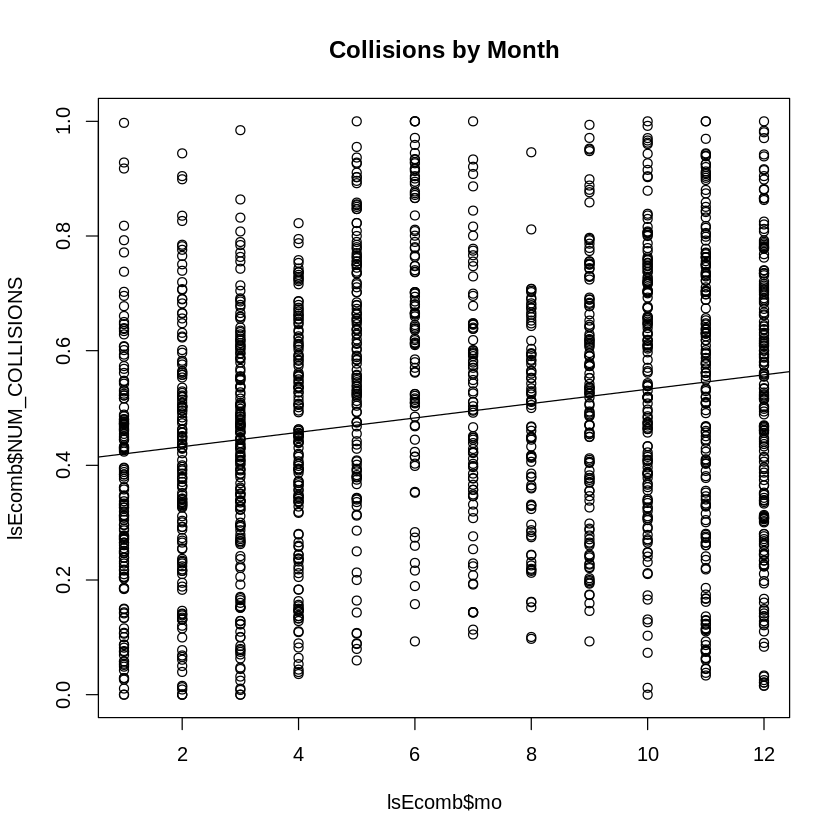

In [49]:
# Month
plot(lsEcomb$NUM_COLLISIONS ~ lsEcomb$mo, main="Collisions by Month")
abline(lm(lsEcomb$NUM_COLLISIONS ~ lsEcomb$mo))
cor(lsEcomb$mo, lsEcomb$NUM_COLLISIONS)

As with year, the data for each month is isolated to allow for the outlying data to be trimmed from each individually.

In [50]:
#January
lsJan <- lsEcomb[which(lsEcomb$mo == 1), ]
dayofmonth <- 1*seq_len(nrow(lsJan))
lsJana <- cbind(dayofmonth, lsJan)

In [51]:
#Feburary
lsFeb <- lsEcomb[which(lsEcomb$mo == 2), ]
dayofmonth <- 1*seq_len(nrow(lsFeb))
lsFeba <- cbind(dayofmonth, lsFeb)

In [52]:
#March
lsMar <- lsEcomb[which(lsEcomb$mo == 3), ]
dayofmonth <- 1*seq_len(nrow(lsMar))
lsMara <- cbind(dayofmonth, lsMar)

In [53]:
#April
lsApr <- lsEcomb[which(lsEcomb$mo == 4), ]
dayofmonth <- 1*seq_len(nrow(lsApr))
lsApra <- cbind(dayofmonth, lsApr)

In [54]:
#May
lsMay <- lsEcomb[which(lsEcomb$mo == 5), ]
dayofmonth <- 1*seq_len(nrow(lsMay))
lsMaya <- cbind(dayofmonth, lsMay)

In [55]:
#June
lsJun <- lsEcomb[which(lsEcomb$mo == 6), ]
dayofmonth <- 1*seq_len(nrow(lsJun))
lsJuna <- cbind(dayofmonth, lsJun)

In [56]:
#July
lsJul <- lsEcomb[which(lsEcomb$mo == 7), ]
dayofmonth <- 1*seq_len(nrow(lsJul))
lsJula <- cbind(dayofmonth, lsJul)

In [57]:
#August
lsAug <- lsEcomb[which(lsEcomb$mo == 8), ]
dayofmonth <- 1*seq_len(nrow(lsAug))
lsAuga <- cbind(dayofmonth, lsAug)

In [58]:
#September
lsSep <- lsEcomb[which(lsEcomb$mo == 9), ]
dayofmonth <- 1*seq_len(nrow(lsSep))
lsSepa <- cbind(dayofmonth, lsSep)

In [59]:
#October
lsOct <- lsEcomb[which(lsEcomb$mo == 10), ]
dayofmonth <- 1*seq_len(nrow(lsOct))
lsOcta <- cbind(dayofmonth, lsOct)

In [60]:
#November
lsNov <- lsEcomb[which(lsEcomb$mo == 11), ]
dayofmonth <- 1*seq_len(nrow(lsNov))
lsNova <- cbind(dayofmonth, lsNov)

In [61]:
#December
lsDec <- lsEcomb[which(lsEcomb$mo == 12), ]
dayofmonth <- 1*seq_len(nrow(lsDec))
lsDeca <- cbind(dayofmonth, lsDec)

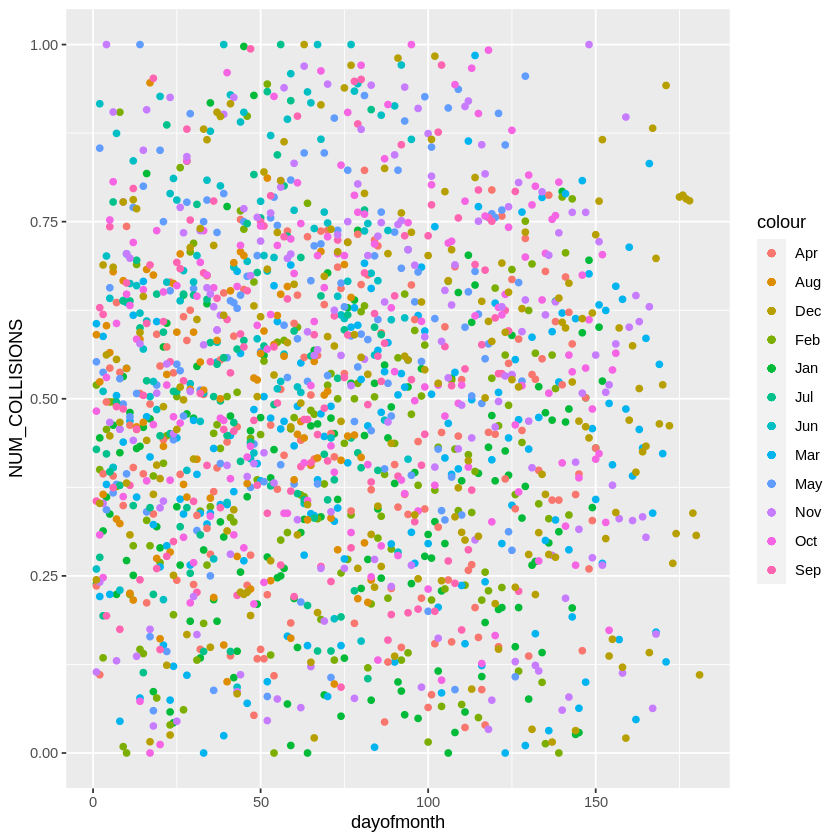

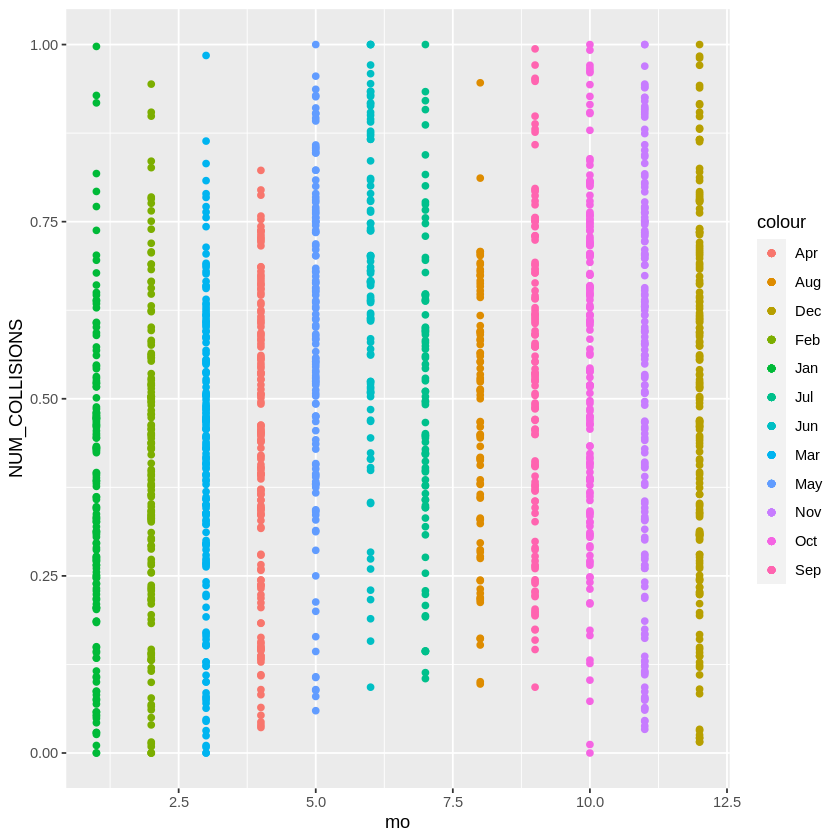

In [62]:
ggplot() +
  geom_point(data=lsJana, aes(dayofmonth, NUM_COLLISIONS, color="Jan")) +
  geom_point(data=lsFeba, aes(dayofmonth, NUM_COLLISIONS, color="Feb")) +
  geom_point(data=lsMara, aes(dayofmonth, NUM_COLLISIONS, color="Mar")) +
  geom_point(data=lsApra, aes(dayofmonth, NUM_COLLISIONS, color="Apr")) +
  geom_point(data=lsMaya, aes(dayofmonth, NUM_COLLISIONS, color="May")) +
  geom_point(data=lsJuna, aes(dayofmonth, NUM_COLLISIONS, color="Jun")) +
  geom_point(data=lsJula, aes(dayofmonth, NUM_COLLISIONS, color="Jul")) +
  geom_point(data=lsAuga, aes(dayofmonth, NUM_COLLISIONS, color="Aug")) +
  geom_point(data=lsSepa, aes(dayofmonth, NUM_COLLISIONS, color="Sep")) +
  geom_point(data=lsOcta, aes(dayofmonth, NUM_COLLISIONS, color="Oct")) +
  geom_point(data=lsNova, aes(dayofmonth, NUM_COLLISIONS, color="Nov")) +
  geom_point(data=lsDeca, aes(dayofmonth, NUM_COLLISIONS, color="Dec"))

ggplot() +
  geom_point(data=lsJana, aes(mo, NUM_COLLISIONS, color="Jan")) +
  geom_point(data=lsFeba, aes(mo, NUM_COLLISIONS, color="Feb")) +
  geom_point(data=lsMara, aes(mo, NUM_COLLISIONS, color="Mar")) +
  geom_point(data=lsApra, aes(mo, NUM_COLLISIONS, color="Apr")) +
  geom_point(data=lsMaya, aes(mo, NUM_COLLISIONS, color="May")) +
  geom_point(data=lsJuna, aes(mo, NUM_COLLISIONS, color="Jun")) +
  geom_point(data=lsJula, aes(mo, NUM_COLLISIONS, color="Jul")) +
  geom_point(data=lsAuga, aes(mo, NUM_COLLISIONS, color="Aug")) +
  geom_point(data=lsSepa, aes(mo, NUM_COLLISIONS, color="Sep")) +
  geom_point(data=lsOcta, aes(mo, NUM_COLLISIONS, color="Oct")) +
  geom_point(data=lsNova, aes(mo, NUM_COLLISIONS, color="Nov")) +
  geom_point(data=lsDeca, aes(mo, NUM_COLLISIONS, color="Dec"))

As the data is already normalised and some cleaning has already been performed, care must be taken not to remove too many values. However, some clear outliers still exist in most months, and must be removed.

In [63]:
lsJanb <- lsJana[which(lsJana$NUM_COLLISIONS <= 0.88), ]
lsJanc <- lsJanb[which(lsJanb$NUM_COLLISIONS >= 0), ]
lsFebb <- lsFeba[which(lsFeba$NUM_COLLISIONS <= 0.88), ]
lsFebc <- lsFebb[which(lsFebb$NUM_COLLISIONS >= 0), ]
lsMarb <- lsMara[which(lsMara$NUM_COLLISIONS <= 0.88), ]
lsMarc <- lsMarb[which(lsMarb$NUM_COLLISIONS >= 0), ]
# April has no major outliers to remove
lsAprc <- lsApra
lsMayb <- lsMaya[which(lsMaya$NUM_COLLISIONS <= 0.98), ]
lsMayc <- lsMayb[which(lsMayb$NUM_COLLISIONS >= 0), ]
lsJunb <- lsJuna[which(lsJuna$NUM_COLLISIONS <= 0.98), ]
lsJunc <- lsJunb[which(lsJunb$NUM_COLLISIONS >= 0.12), ]
lsJulb <- lsJula[which(lsJula$NUM_COLLISIONS <= 0.98), ]
lsJulc <- lsJulb[which(lsJulb$NUM_COLLISIONS >= 0.12), ]
lsAugb <- lsAuga[which(lsAuga$NUM_COLLISIONS <= 0.75), ]
lsAugc <- lsAugb[which(lsAugb$NUM_COLLISIONS >= 0.12), ]
lsSepb <- lsSepa[which(lsSepa$NUM_COLLISIONS <= 0.98), ]
lsSepc <- lsSepb[which(lsSepb$NUM_COLLISIONS >= 0.12), ]
# Only lower outliers removed from October
lsOctc <- lsOcta[which(lsOcta$NUM_COLLISIONS >= 0.12), ]
# Only upper outliers removed from November
lsNovc <- lsNova[which(lsNova$NUM_COLLISIONS <= 0.98), ]
# Only lower outliers removed from December
lsDecc <- lsDeca[which(lsDeca$NUM_COLLISIONS >= 0.06), ]

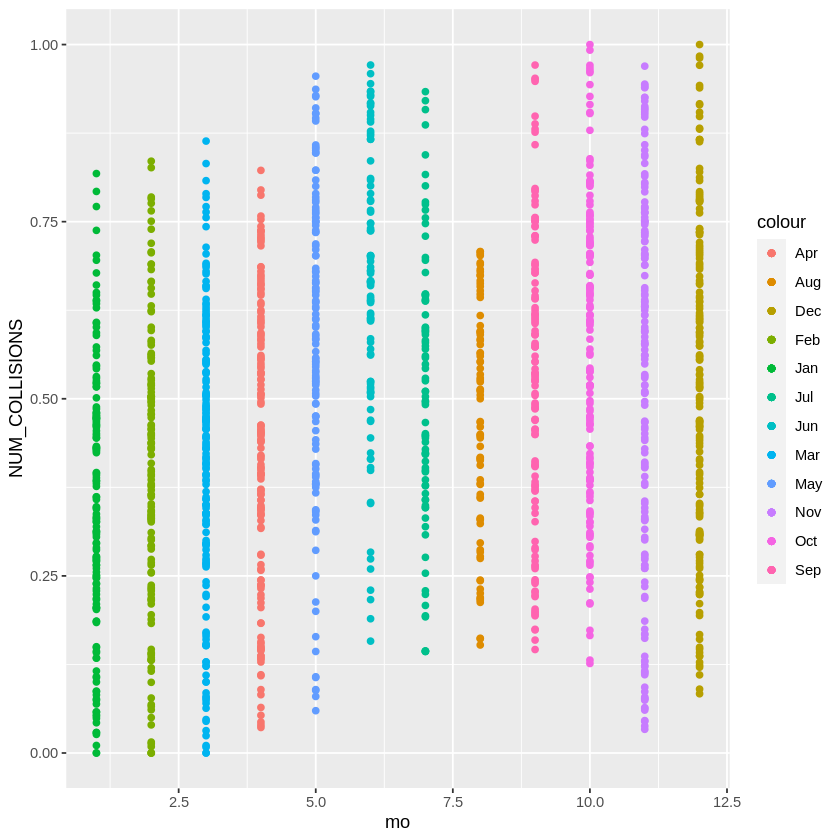

In [64]:
ggplot() +
  geom_point(data=lsJanc, aes(mo, NUM_COLLISIONS, color="Jan")) +
  geom_point(data=lsFebc, aes(mo, NUM_COLLISIONS, color="Feb")) +
  geom_point(data=lsMarc, aes(mo, NUM_COLLISIONS, color="Mar")) +
  geom_point(data=lsAprc, aes(mo, NUM_COLLISIONS, color="Apr")) +
  geom_point(data=lsMayc, aes(mo, NUM_COLLISIONS, color="May")) +
  geom_point(data=lsJunc, aes(mo, NUM_COLLISIONS, color="Jun")) +
  geom_point(data=lsJulc, aes(mo, NUM_COLLISIONS, color="Jul")) +
  geom_point(data=lsAugc, aes(mo, NUM_COLLISIONS, color="Aug")) +
  geom_point(data=lsSepc, aes(mo, NUM_COLLISIONS, color="Sep")) +
  geom_point(data=lsOctc, aes(mo, NUM_COLLISIONS, color="Oct")) +
  geom_point(data=lsNovc, aes(mo, NUM_COLLISIONS, color="Nov")) +
  geom_point(data=lsDecc, aes(mo, NUM_COLLISIONS, color="Dec"))

While more data appears to be outliers in the cleaned data, it would be unwise to remove much more as the overall outliers have already been removed. The data for all months are now merged back into one data set.

In [65]:
lsEcomb2 <- rbind(lsJanc, lsFebc, lsMarc, lsAprc, lsMayc, lsJunc, lsJulc, lsAugc, lsSepc, lsOctc, lsNovc, lsDecc)

[1] -0.367159

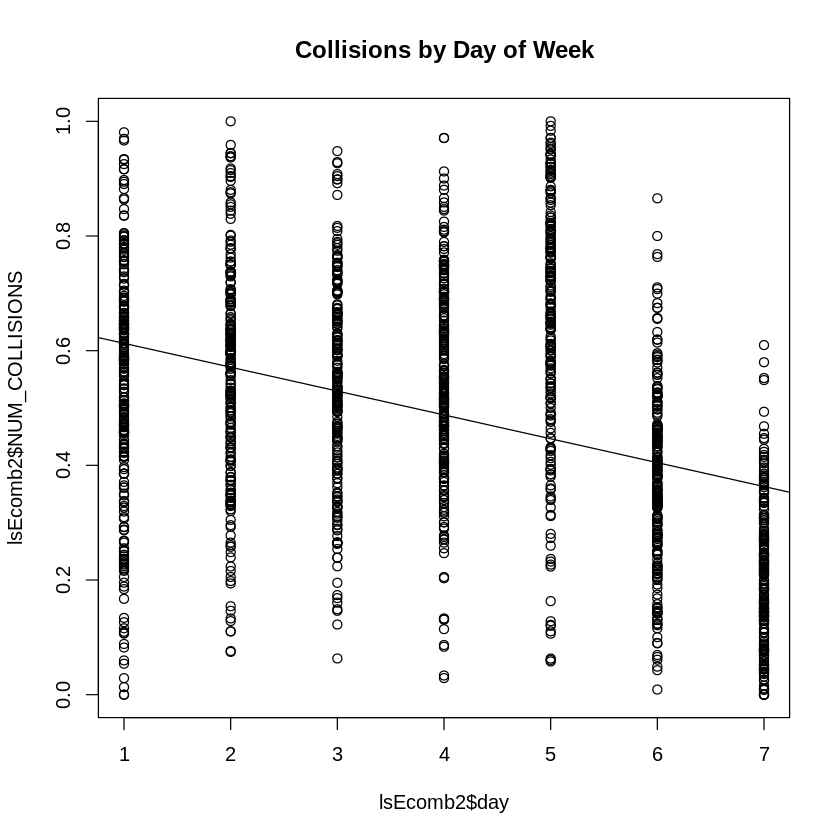

In [66]:
# Day of Week
plot(lsEcomb2$NUM_COLLISIONS ~ lsEcomb2$day, main="Collisions by Day of Week")
abline(lm(lsEcomb2$NUM_COLLISIONS ~ lsEcomb2$day))
cor(lsEcomb2$day, lsEcomb2$NUM_COLLISIONS)

As performed for year and month, each day of the week is isolated for individual cleaning.

In [67]:
#Monday
lsMon <- lsEcomb2[which(lsEcomb2$day == 1), ]
dayofweek <- 1*seq_len(nrow(lsMon))
lsMona <- cbind(dayofweek, lsMon)

In [68]:
#Tuesday
lsTue <- lsEcomb2[which(lsEcomb2$day == 2), ]
dayofweek <- 1*seq_len(nrow(lsTue))
lsTuea <- cbind(dayofweek, lsTue)

In [69]:
#Wednesday
lsWed <- lsEcomb2[which(lsEcomb2$day == 3), ]
dayofweek <- 1*seq_len(nrow(lsWed))
lsWeda <- cbind(dayofweek, lsWed)

In [70]:
#Thursday
lsThu <- lsEcomb2[which(lsEcomb2$day == 4), ]
dayofweek <- 1*seq_len(nrow(lsThu))
lsThua <- cbind(dayofweek, lsThu)

In [71]:
#Friday
lsFri <- lsEcomb2[which(lsEcomb2$day == 5), ]
dayofweek <- 1*seq_len(nrow(lsFri))
lsFria <- cbind(dayofweek, lsFri)

In [72]:
#Saturday
lsSat <- lsEcomb2[which(lsEcomb2$day == 6), ]
dayofweek <- 1*seq_len(nrow(lsSat))
lsSata <- cbind(dayofweek, lsSat)

In [73]:
#Sunday
lsSun <- lsEcomb2[which(lsEcomb2$day == 7), ]
dayofweek <- 1*seq_len(nrow(lsSun))
lsSuna <- cbind(dayofweek, lsSun)

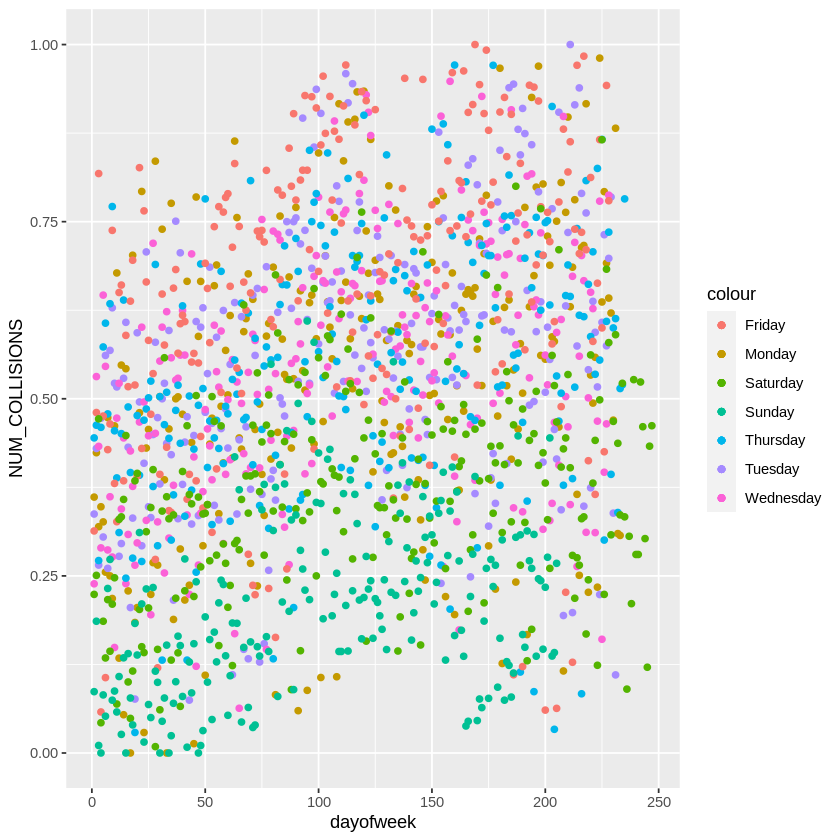

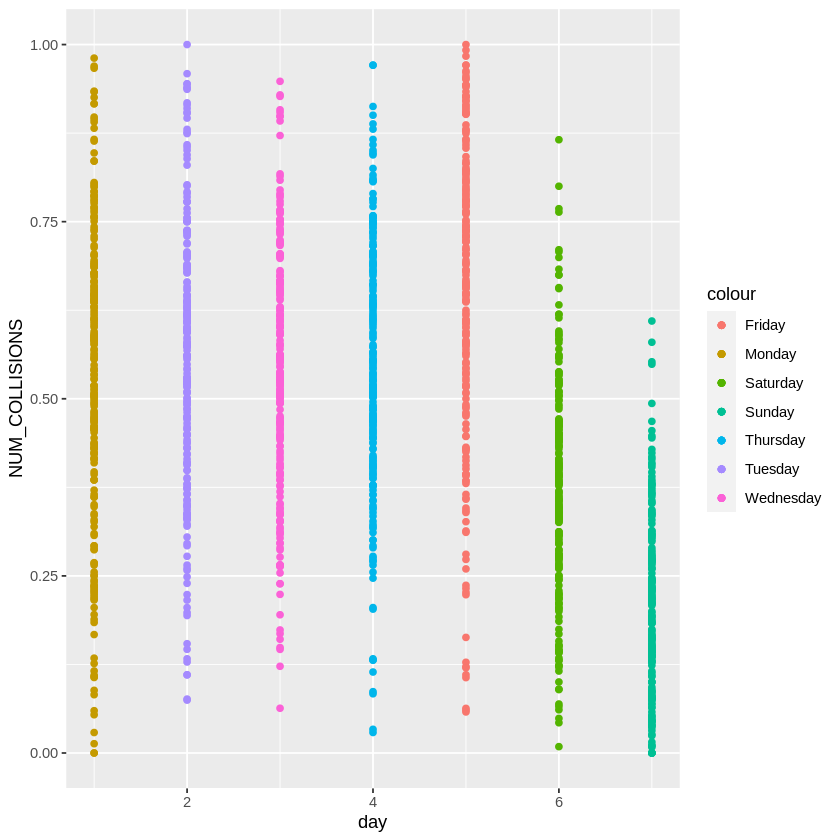

In [74]:
ggplot() +
  geom_point(data=lsMona, aes(dayofweek, NUM_COLLISIONS, color="Monday")) +
  geom_point(data=lsTuea, aes(dayofweek, NUM_COLLISIONS, color="Tuesday")) +
  geom_point(data=lsWeda, aes(dayofweek, NUM_COLLISIONS, color="Wednesday")) +
  geom_point(data=lsThua, aes(dayofweek, NUM_COLLISIONS, color="Thursday")) +
  geom_point(data=lsFria, aes(dayofweek, NUM_COLLISIONS, color="Friday")) +
  geom_point(data=lsSata, aes(dayofweek, NUM_COLLISIONS, color="Saturday")) +
  geom_point(data=lsSuna, aes(dayofweek, NUM_COLLISIONS, color="Sunday"))

ggplot() +
  geom_point(data=lsMona, aes(day, NUM_COLLISIONS, color="Monday")) +
  geom_point(data=lsTuea, aes(day, NUM_COLLISIONS, color="Tuesday")) +
  geom_point(data=lsWeda, aes(day, NUM_COLLISIONS, color="Wednesday")) +
  geom_point(data=lsThua, aes(day, NUM_COLLISIONS, color="Thursday")) +
  geom_point(data=lsFria, aes(day, NUM_COLLISIONS, color="Friday")) +
  geom_point(data=lsSata, aes(day, NUM_COLLISIONS, color="Saturday")) +
  geom_point(data=lsSuna, aes(day, NUM_COLLISIONS, color="Sunday"))

Only the extreme outliers for each day are removed to avoid removing too many values.

In [75]:
# Only extreme outliers removed
lsMonc <- lsMona
lsTuec <- lsTuea[which(lsTuea$NUM_COLLISIONS <= 0.98), ]
lsWedc <- lsWeda[which(lsWeda$NUM_COLLISIONS >= 0.12), ]
lsThub <- lsThua[which(lsThua$NUM_COLLISIONS <= 0.95), ]
lsThuc <- lsThub[which(lsThub$NUM_COLLISIONS >= 0.14), ]
lsFric <- lsFria[which(lsFria$NUM_COLLISIONS >= 0.07), ]
lsSatb <- lsSata[which(lsSata$NUM_COLLISIONS <= 0.75), ]
lsSatc <- lsSatb[which(lsSatb$NUM_COLLISIONS >= 0.02), ]
lsSunc <- lsSuna[which(lsSuna$NUM_COLLISIONS <= 0.50), ]

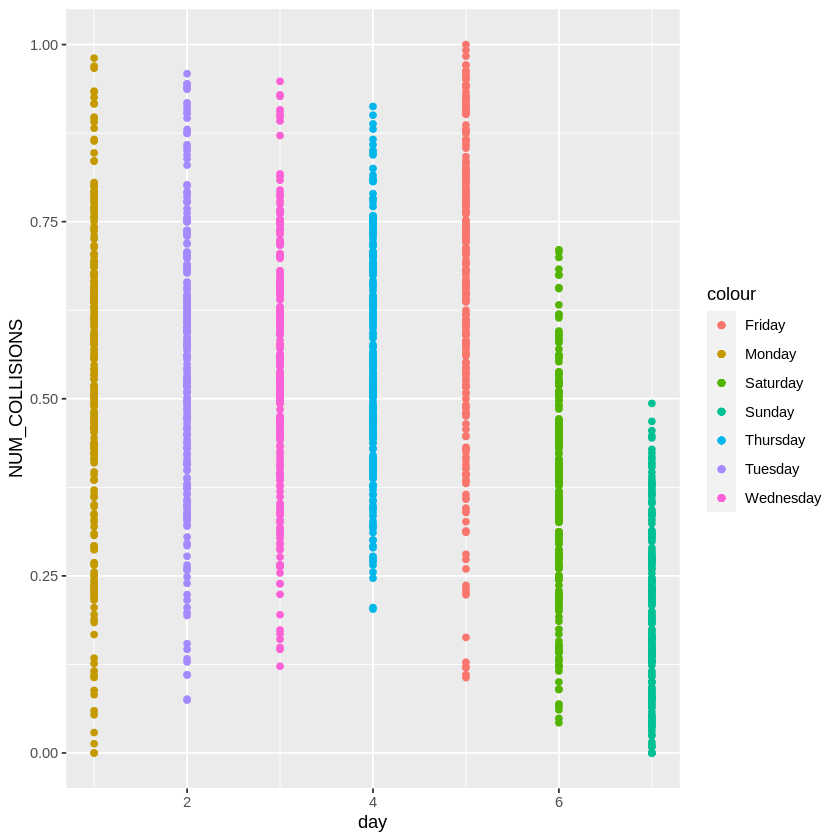

In [76]:
ggplot() +
  geom_point(data=lsMonc, aes(day, NUM_COLLISIONS, color="Monday")) +
  geom_point(data=lsTuec, aes(day, NUM_COLLISIONS, color="Tuesday")) +
  geom_point(data=lsWedc, aes(day, NUM_COLLISIONS, color="Wednesday")) +
  geom_point(data=lsThuc, aes(day, NUM_COLLISIONS, color="Thursday")) +
  geom_point(data=lsFric, aes(day, NUM_COLLISIONS, color="Friday")) +
  geom_point(data=lsSatc, aes(day, NUM_COLLISIONS, color="Saturday")) +
  geom_point(data=lsSunc, aes(day, NUM_COLLISIONS, color="Sunday"))

The small spike on friday may be caused by increased traffic from people returning home for the weekend. The cleaned days of the week are now merged back together.

In [77]:
lsEcomb3 <- rbind(lsMonc, lsTuec, lsWedc, lsThuc, lsFric, lsSatc, lsSunc)

[1] 0.2217952

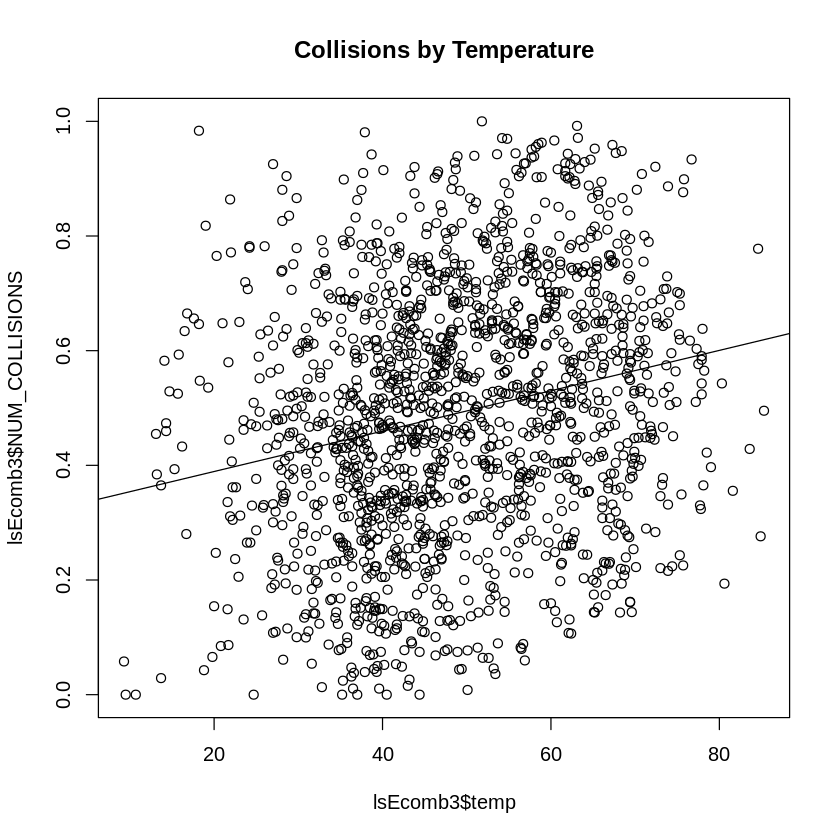

In [78]:
# Temperature
plot(lsEcomb3$NUM_COLLISIONS ~ lsEcomb3$temp, main="Collisions by Temperature")
abline(lm(lsEcomb3$NUM_COLLISIONS ~ lsEcomb3$temp))
cor(lsEcomb3$temp, lsEcomb3$NUM_COLLISIONS)

It would be far too time consuming to attempt the same level of cleaning with temperature as was done with year, month, and weekday. Only the most extreme of outliers will be removed.

In [79]:
lstemp <- lsEcomb3[which(lsEcomb3$temp <= 80), ]
lscomb4 <- lstemp[which(lstemp$temp >= 20), ]

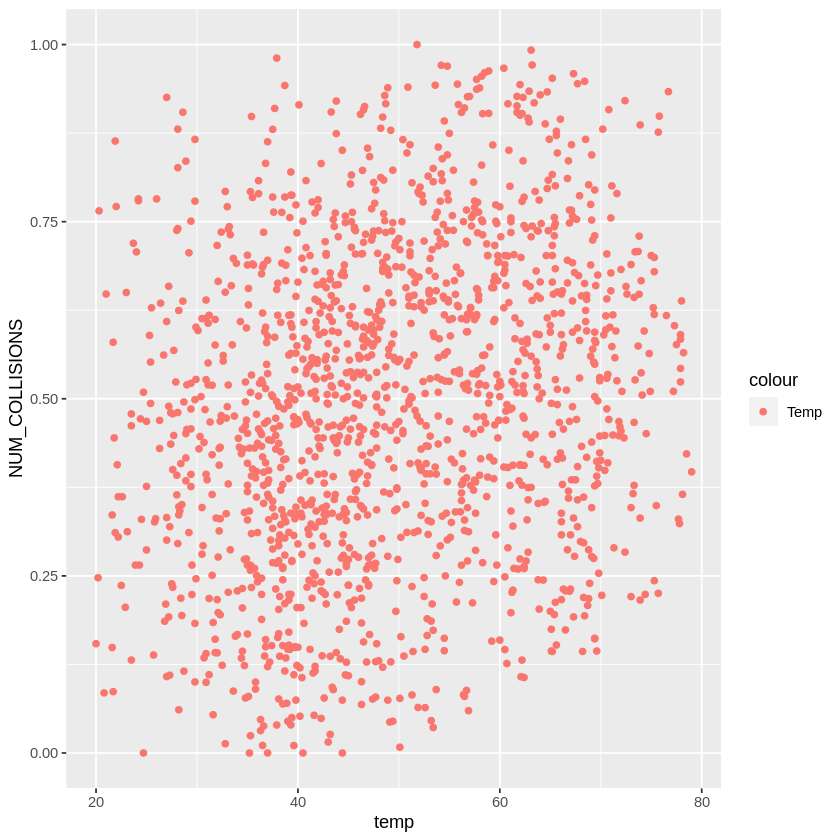

In [80]:
ggplot() +
  geom_point(data=lscomb4, aes(temp, NUM_COLLISIONS, color="Temp"))

[1] -0.04768184

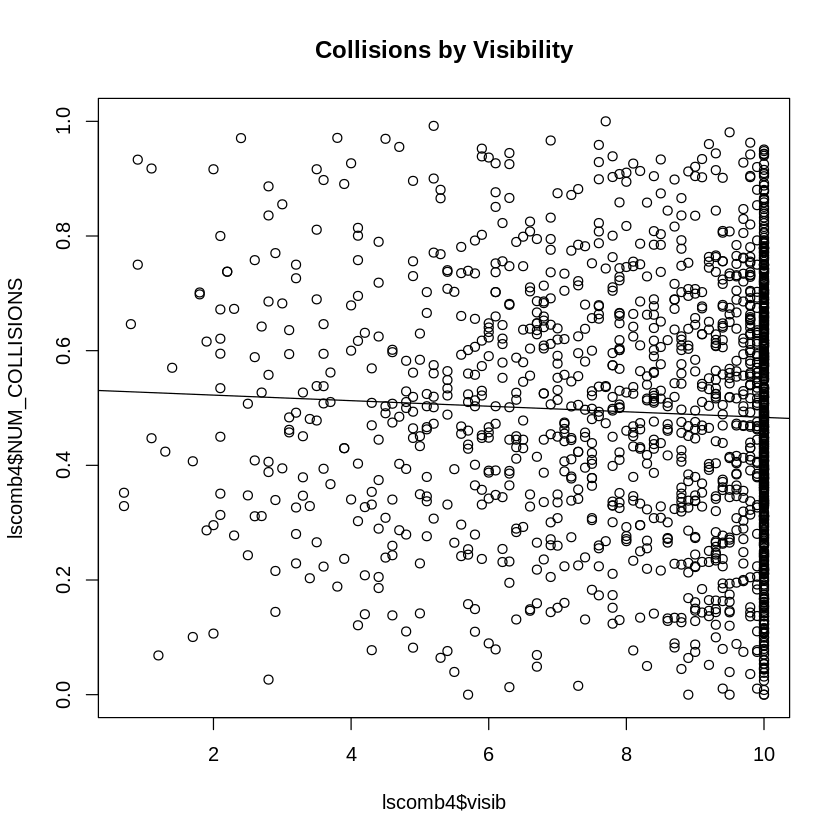

In [81]:
# Visibility
plot(lscomb4$NUM_COLLISIONS ~ lscomb4$visib, main="Collisions by Visibility")
abline(lm(lscomb4$NUM_COLLISIONS ~ lscomb4$visib))
cor(lscomb4$visib, lscomb4$NUM_COLLISIONS)

Visibility has a very small negative correlation. Even light cleaning of the most extreme outliers reduces the correlation, so for the purposes of the report no cleaning shall be performed on visibility.

In [82]:
lscomb5 <- lscomb4

[1] -0.01310991

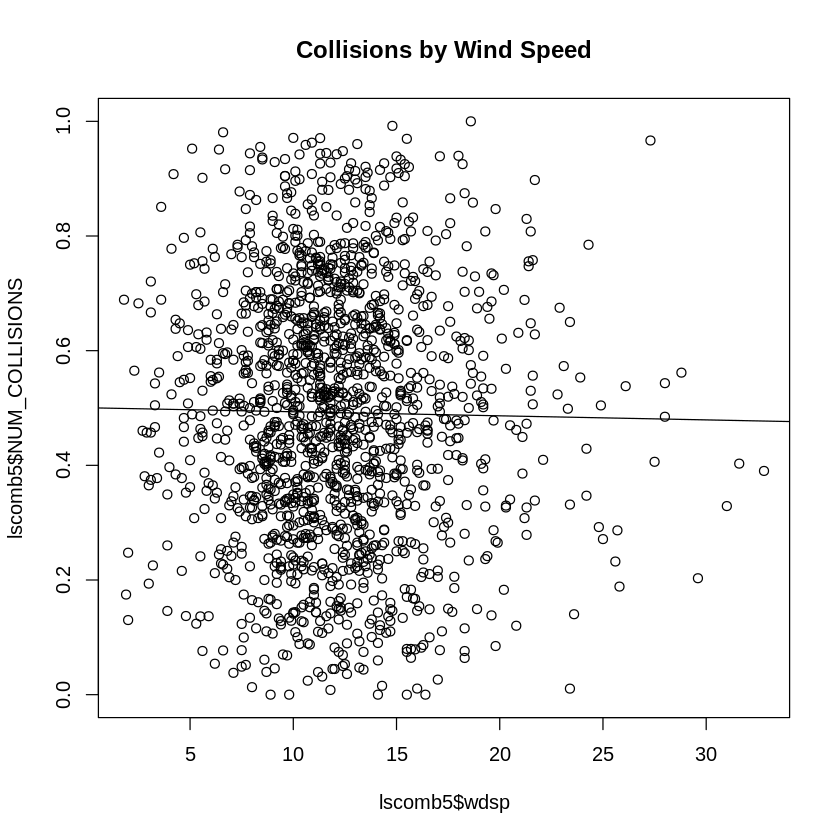

In [83]:
# Wind Speed
plot(lscomb5$NUM_COLLISIONS ~ lscomb5$wdsp, main="Collisions by Wind Speed")
abline(lm(lscomb5$NUM_COLLISIONS ~ lscomb5$wdsp))
cor(lscomb5$wdsp, lscomb5$NUM_COLLISIONS)

As with temperature, only the extreme outliers are removed from wind speed as attempting a deep clean of all wind speed values is not tenable.

In [84]:
lswind <- lscomb5[which(lscomb5$wdsp <= 30), ]
lsClean <- lswind[which(lswind$wdsp >= 4), ]

Cleaning of the chosen data values is complete, and further investigations can continue.

# Observations
With the cleaning complete for all attributes considered viable for correlation with NUM_COLLISIONS, the cleaned data is compared to the original. The correlation values between each value and collisions in the cleaned data is compared to the correlation value with the original. This is to confirm that the prior observed correlations exist, and with cleaning they should hopefully have been strengthened.

[1] 0.2205393

[1] 0.00469641

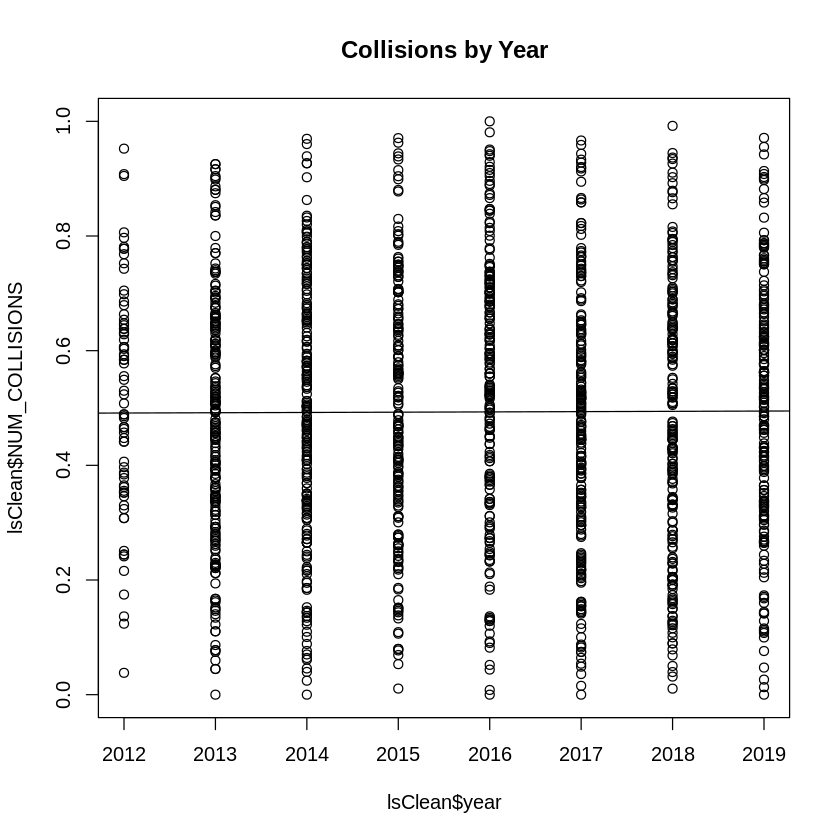

In [85]:
# Year
cor(ls5$year, ls5$NUM_COLLISIONS)
cor(lsClean$year, lsClean$NUM_COLLISIONS)
plot(lsClean$NUM_COLLISIONS ~ lsClean$year, main="Collisions by Year")
abline(lm(lsClean$NUM_COLLISIONS ~ lsClean$year))


As the data has been normalised to account for the yearly upward trend, year no longer has any meaningful correlation to the number of collisions. This was expected and shows that the data has been successfully normalised.

[1] 0.1538994

[1] 0.2434678

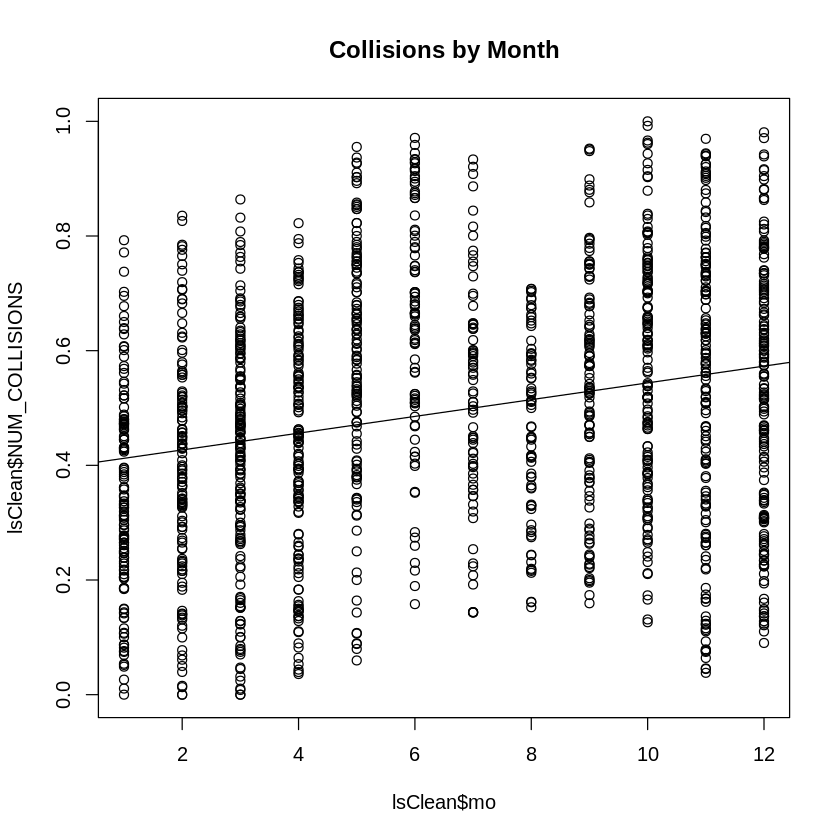

In [86]:
# Month
cor(ls5$mo, ls5$NUM_COLLISIONS)
cor(lsClean$mo, lsClean$NUM_COLLISIONS)
plot(lsClean$NUM_COLLISIONS ~ lsClean$mo, main="Collisions by Month")
abline(lm(lsClean$NUM_COLLISIONS ~ lsClean$mo))


The positive correlation between month and the number of collisions has increased substantially.

[1] -0.3052071

[1] -0.3829451

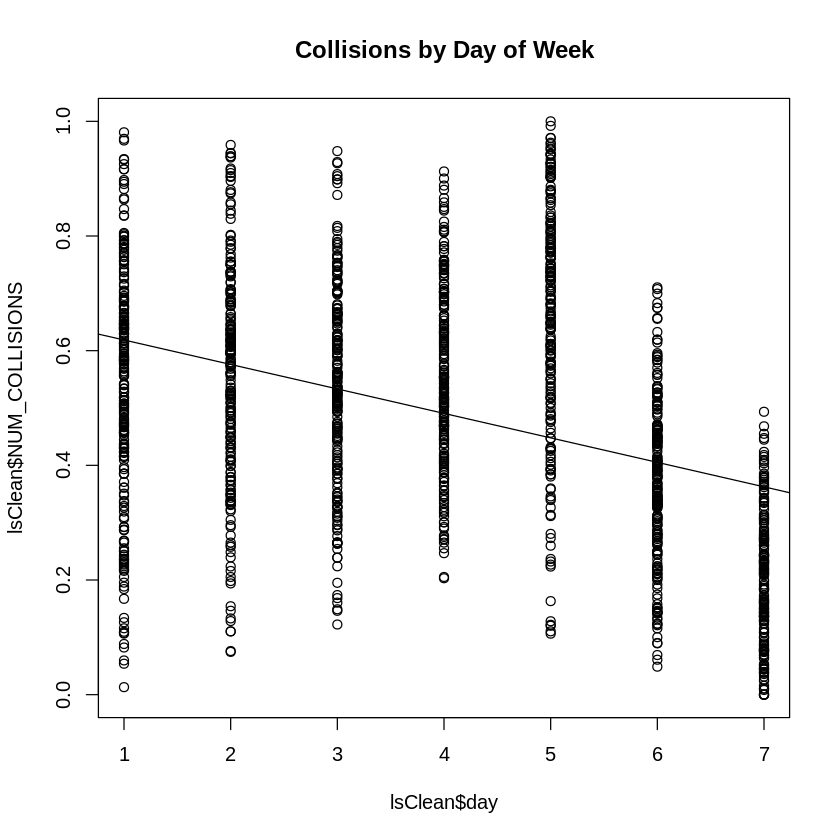

In [87]:
# Day of Week
cor(ls5$day, ls5$NUM_COLLISIONS)
cor(lsClean$day, lsClean$NUM_COLLISIONS)

plot(lsClean$NUM_COLLISIONS ~ lsClean$day, main="Collisions by Day of Week")
abline(lm(lsClean$NUM_COLLISIONS ~ lsClean$day))

There is a strong negative correlation between the day of the week and the number of collisions, which has been slightly increased by cleaning.

[1] 0.1727345

[1] 0.2376339

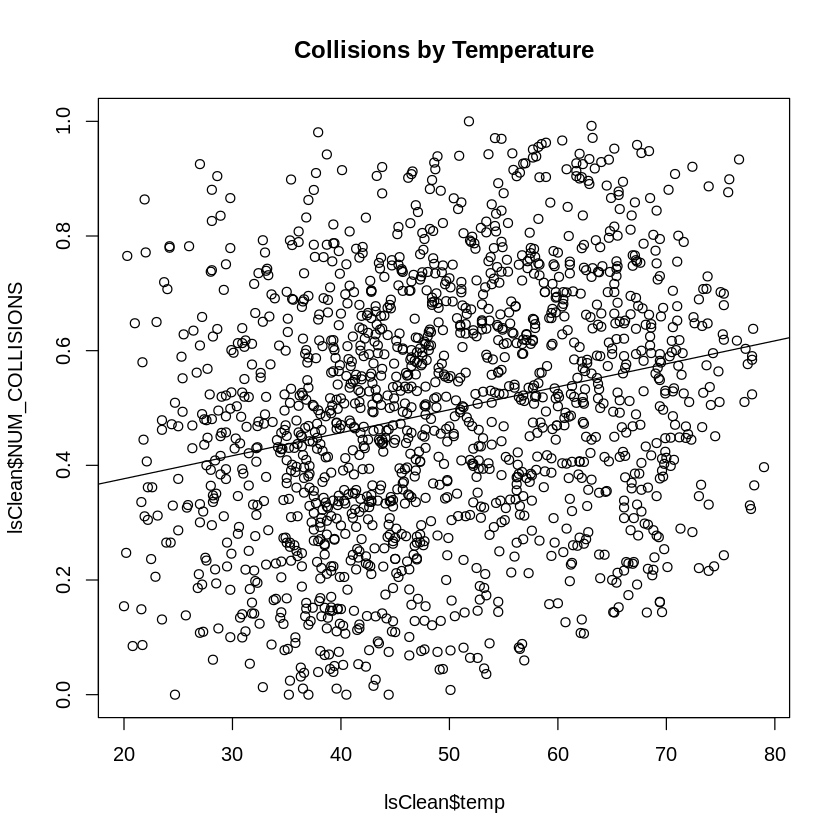

In [88]:
# Temperature
cor(ls5$temp, ls5$NUM_COLLISIONS)
cor(lsClean$temp, lsClean$NUM_COLLISIONS)

plot(lsClean$NUM_COLLISIONS ~ lsClean$temp, main="Collisions by Temperature")
abline(lm(lsClean$NUM_COLLISIONS ~ lsClean$temp))

The positive correlation with temperature and collisions has been increased by a decent margin.

[1] -0.06609563

[1] -0.04986834

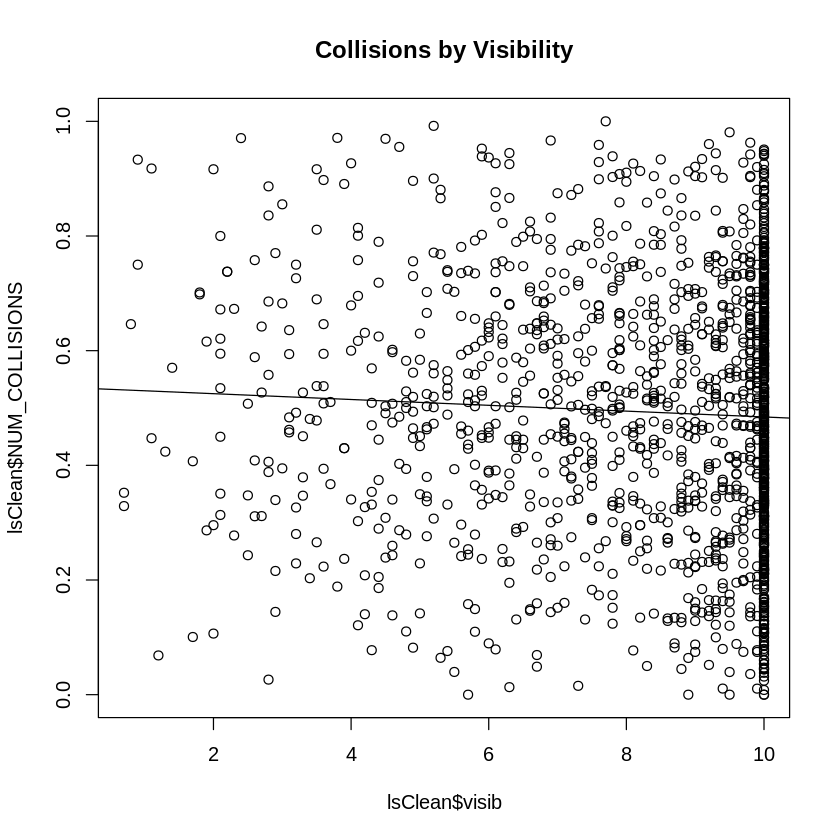

In [89]:
# Visibility
cor(ls5$visib, ls5$NUM_COLLISIONS)
cor(lsClean$visib, lsClean$NUM_COLLISIONS)

plot(lsClean$NUM_COLLISIONS ~ lsClean$visib, main="Collisions by Visibility")
abline(lm(lsClean$NUM_COLLISIONS ~ lsClean$visib))

Unfortunately, the cleaning of dirty data has decreased the visible correlation between visib and NUM_COLLISIONS. It can be assumed that some of the data accounting for the slightly stronger correlation was dirty.

[1] 0.04474914

[1] -0.0183154

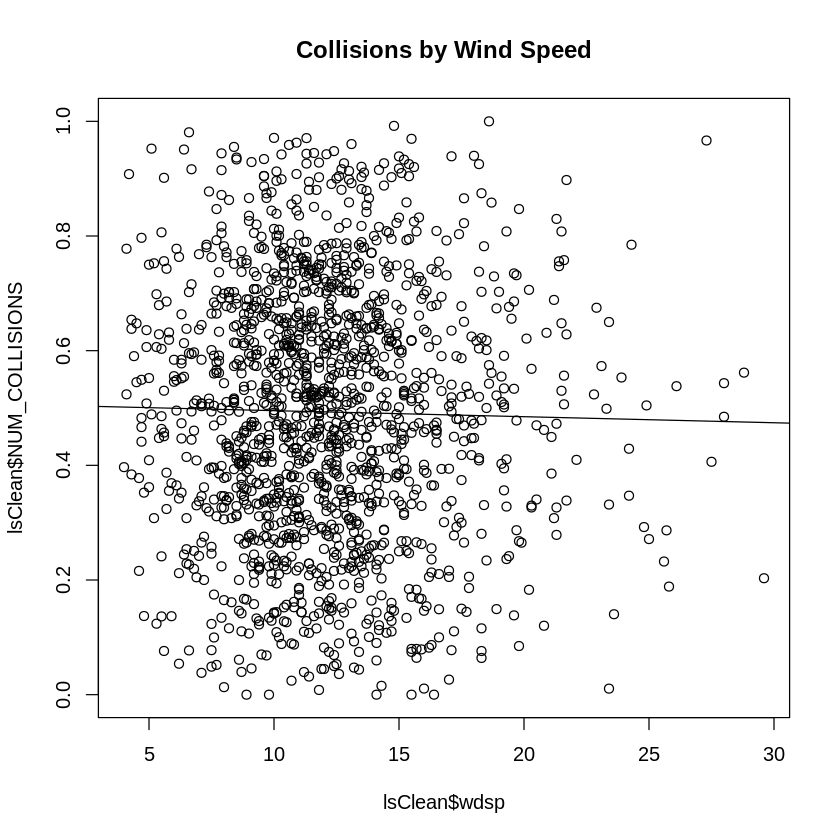

In [90]:
# Wind Speed
cor(ls5$wdsp, ls5$NUM_COLLISIONS)
cor(lsClean$wdsp, lsClean$NUM_COLLISIONS)

plot(lsClean$NUM_COLLISIONS ~ lsClean$wdsp, main="Collisions by Wind Speed")
abline(lm(lsClean$NUM_COLLISIONS ~ lsClean$wdsp))

Interestingly, removing dirty data has not just reduced the small positive correlation between wind speed and collisions, but in fact revealed a very small negative correlation. This change in correlation occured before any changes to the wind speed data were performed, so the correlation was purely a result of dirty data entries.

In [91]:
# Clean Correlations
cor(lsClean$mo, lsClean$NUM_COLLISIONS)
cor(lsClean$day, lsClean$NUM_COLLISIONS)
cor(lsClean$temp, lsClean$NUM_COLLISIONS)
cor(lsClean$visib, lsClean$NUM_COLLISIONS)
cor(lsClean$wdsp, lsClean$NUM_COLLISIONS)

[1] 0.2434678

[1] -0.3829451

[1] 0.2376339

[1] -0.04986834

[1] -0.0183154

With the data cleaned, it is clear that Temperature has the greatest impact on collisions of any weather data. The month of the year appears to have just as much effect on collisions as the temperature, and the day of the week is the single largest factor- presumably due to fluxuating traffic volume.

While visibility and windspeed have very little impact on the number of collisions, they will still be included to provide a variety of values to use for the testing of prediction models.

# Preparing Data for Exporting
With the cleaning complete, a decent normalised distribution of the collision data is ready for exporting. A histogram and density plot are printed to confirm the balanced spread of data.

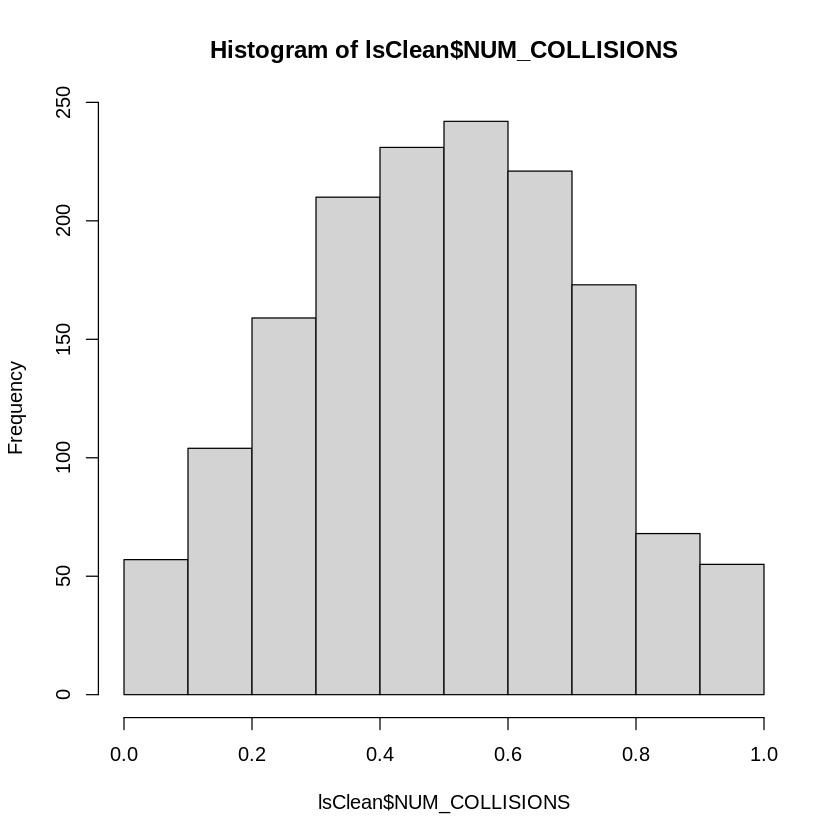

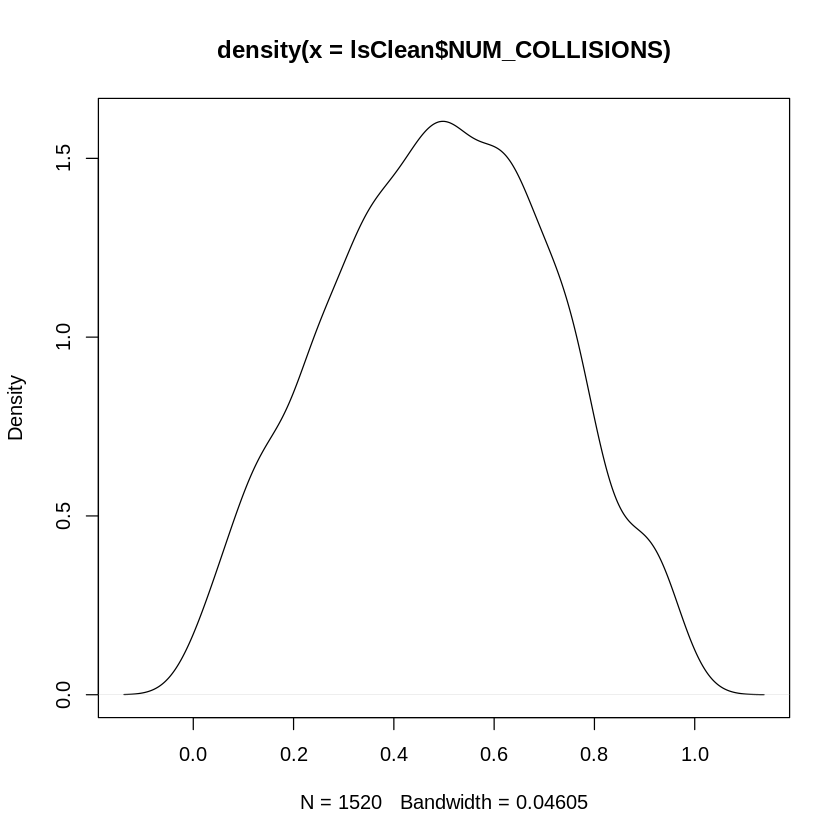

In [92]:
hist(lsClean$NUM_COLLISIONS, breaks = 10)
plot(density(lsClean$NUM_COLLISIONS))

Only the data values chosen with decent levels of correlation with NUM_COLLISIONS will be exported, with a new dataset created with the chosen columns and NUM_COLLISIONS.

In [93]:
head(lsClean)

dayofweek dayofmonth dayindex dayofyear day year mo da collision_date temp
191 1          4         191       7        1   2013 1   7 2013-01-07     35.9
198 2          8         195      11        1   2013 1  14 2013-01-14     47.2
212 3         19         208      24        1   2013 1  28 2013-01-28     27.3
555 4         25         555       6        1   2014 1   6 2014-01-06     46.3
576 5         38         572      23        1   2014 1  27 2014-01-27     38.8
919 6         44         919       5        1   2015 1   5 2015-01-05     44.0
    ⋯ visib wdsp mxpsd gust max  min  prcp sndp  fog NUM_COLLISIONS
191 ⋯ 8.8    8.5 17.1  22.0 42.1 28.0 0.01 999.9 0   0.3611940     
198 ⋯ 1.3    8.2 15.9  21.0 51.8 44.6 0.00 999.9 1   0.4238806     
212 ⋯ 8.8    7.4 14.0  20.0 32.0 21.9 0.00 999.9 0   0.3194030     
555 ⋯ 2.5   14.8 20.0  26.0 52.0 41.0 0.04 999.9 1   0.3475610     
576 ⋯ 8.8   12.3 17.1  22.9 45.0 21.0 0.00 999.9 0   0.3262195     
919 ⋯ 7.6   16.3 28.9  39.0 55.0 28.9 0.27 999.9 0   0.2553191

In [94]:
# Overall data set
# Chosen columns - day, mo, temp, visib, wdsp, NUM_COLLISIONS
linearregressiondata <- lsClean[,c(5,7,10,12,13,21)]
head(linearregressiondata)

day mo temp visib wdsp NUM_COLLISIONS
191 1   1  35.9 8.8    8.5 0.3611940     
198 1   1  47.2 1.3    8.2 0.4238806     
212 1   1  27.3 8.8    7.4 0.3194030     
555 1   1  46.3 2.5   14.8 0.3475610     
576 1   1  38.8 8.8   12.3 0.3262195     
919 1   1  44.0 7.6   16.3 0.2553191

When it comes to creating linear regression models, it may be useful to test if including or exclusing certain data values produce more accurate prediction models. To that end, a series of data sets will be exported. It would be possible to export a single set and separate it when it comes to the modelling, but creating multiple sets now will streamline the modelling process.

In [95]:
# Time based data set - month and day of week
LRDTime <- linearregressiondata[,c(1,2,6)]
head(LRDTime)

day mo NUM_COLLISIONS
191 1   1  0.3611940     
198 1   1  0.4238806     
212 1   1  0.3194030     
555 1   1  0.3475610     
576 1   1  0.3262195     
919 1   1  0.2553191

In [96]:
# Weather based data set - temperature, wind speed, visibility
LRDWeather <- linearregressiondata[,c(3,4,5,6)]
head(LRDWeather)

temp visib wdsp NUM_COLLISIONS
191 35.9 8.8    8.5 0.3611940     
198 47.2 1.3    8.2 0.4238806     
212 27.3 8.8    7.4 0.3194030     
555 46.3 2.5   14.8 0.3475610     
576 38.8 8.8   12.3 0.3262195     
919 44.0 7.6   16.3 0.2553191

In [97]:
# Season based data set - month and temperature
LRDSeason <- linearregressiondata[,c(2,3,6)]
head(LRDSeason)

mo temp NUM_COLLISIONS
191 1  35.9 0.3611940     
198 1  47.2 0.4238806     
212 1  27.3 0.3194030     
555 1  46.3 0.3475610     
576 1  38.8 0.3262195     
919 1  44.0 0.2553191

Data sets created (NUM_COLLISIONS included in every data set):

*   LRD: Full set of chosen data values (day, mo, temp, visib, wdsp)
*   LRDTime: Data based on time (day, mo)
*   LRDWeather: Data based on weather (temp, visib, wdsp)
*   LRDSeason: Data based on season (mo, temp)

The created data sets are exported for use in regression modelling.


In [98]:
write.csv(linearregressiondata, file="/content/LRD.csv")
write.csv(LRDTime, file="/content/LRDTime.csv")
write.csv(LRDWeather, file="/content/LRDWeather.csv")
write.csv(LRDSeason, file="/content/LRDSeason.csv")

# Conclusion

Examining the data has revealed that most recorded weather data has little to no impact on the number of collisions, and is therefore useless for construction of regression models for predicting collisions. The prescence of fog, level of precipitation, sea level pressure, and most other weather data does not have high enough correlation to be seriously considered for attempting to predict the number of collisions; individual collisions may be caused by roads slippy from rain or ice, or obscured vision from fog, but they do not have a large enough impact on the data to be useful for regression modelling.

Visibility and Average Wind speed appear to have a small effect, though on their own still have very little impact on whether collisions are high or low. For the purposes of constructing a useful model it is helpful to have a range of values to observe which combination produces a model with the highest accuracy, so visib and wdpsd will still be of some use in regression modelling.

The single most important piece of weather data appears to be the temperature, as a strong correlation between the average temperature and the number of collisions was observed. However, temperature is joined by the month of the year and day of the week as the most impactful values in terms of numerical correlation. It appears that the seasonal changes in climate and weekly fluxuation of traffic are the largest contributers to increases and decreases in collisions, and should be the focus of any regression models created to attempt to predict the number of collisions.

# References
Becker, N., Rust, H. W. & Ulbrich, U., 2022. Weather impacts on various types of road crashes: a quantitative analysis using generalized additive models. [Online]
Available at: https://etrr.springeropen.com/articles/10.1186/s12544-022-00561-2#Sec22

Davies, J., 2017. Analysis of weather, https://analysisfunction.civilservice.gov.uk/wp-content/uploads/2017/01/Road-accidents.pdf: Office for National Statistics.

Department for Transport, 2014. Modelling the impact of the weather, s.l.: Department for Transport.

Federal Highway Administration, 2023. How Do Weather Events Impact Roads?. [Online]
Available at: https://ops.fhwa.dot.gov/weather/q1_roadimpact.htm

Google, 2024. Cloud data warehouse to power your data-driven innovation. [Online]
Available at: https://cloud.google.com/bigquery

Kerr, A., 2021. A Historical Timeline of COVID-19 in New York City. [Online]
Available at: https://www.investopedia.com/historical-timeline-of-covid-19-in-new-york-city-5071986

Lanigan, T., Raschka, S. & Amor, A., 2024. Importance of Feature Scaling. [Online]
Available at: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

Met Office, 2024. High and low pressure. [Online]
Available at: https://www.metoffice.gov.uk/weather/learn-about/weather/how-weather-works/high-and-low-pressure

National Oceanic and Atmospheric Administration, 2024. Wind Chill. [Online]
Available at: https://www.weather.gov/ama/WindChill

New York State, 2020. Governor Cuomo Signs the 'New York State on PAUSE' Executive Order. [Online]
Available at: https://www.governor.ny.gov/news/governor-cuomo-signs-new-york-state-pause-executive-order

NOAA, 1998. Water Pressures at Ocean Depths. [Online]
Available at: https://www.pmel.noaa.gov/eoi/nemo1998/education/pressure.html

Risk Factor, 2024. Does New York have Wind Risk?. [Online]
Available at: https://riskfactor.com/city/new-york/3651000_fsid/wind

Siegel, E., 2021. Where Are The Fastest Planetary Winds In The Universe?. [Online]
Available at: https://www.forbes.com/sites/startswithabang/2021/08/30/where-are-the-fastest-planetary-winds-in-the-universe/?sh=344a1d9b6faa

Weaver, S., 2023. The NYC School Calendar for 2023-2024. [Online]
Available at: https://www.timeout.com/new-york-kids/things-to-do/the-nyc-school-calendar-for-2021-2022

World Health Organisation, 2020. WHO Director-General's opening remarks at the media briefing on COVID-19 - 11 March 2020. [Online]
Available at: https://www.who.int/director-general/speeches/detail/who-director-general-s-opening-remarks-at-the-media-briefing-on-covid-19---11-march-2020

Zerkel, E., Gilbert, M. & Elamroussi, A., 2023. Record rain in New York City generates ‘life-threatening’ flooding, overwhelming streets and subways. [Online]
Available at: https://edition.cnn.com/2023/09/29/weather/new-york-city-northeast-rain-flood-forecast-climate-friday/index.html


